$$\LARGE\textbf{Statistics for Artificial Intelligence & Data Science}$$

$$\Large\textbf{Property Price Analysis}$$

$$\Large\textbf{Daniel Elston}$$

$$\newline$$

$\Large\textbf{Contents:}$

**Notebook Outline**

**Section 1: Introducing the Dataset**

> **1.1:** Data Load In

> **1.2:** Data Preparation

>> **1.2.1:** Date Conversion

>> **1.2.2:** Separating Region and Area Data

>> **1.2.3:** Applying Region Names to Areas

>> **1.2.4:** Null Values

> **1.3:** Final Data Sets

**Section 2: Trends and Analysis**

> **2.1:** Property Price Trends Per Region

> **2.2:** Property Price Comparison by Region

> **2.3:** Property Price Fluctuations

**Section 3: Change in Flat Prices**

> **3.1:** Flat Price Changes 17-18

> **3.2:** Price Change Visualisation

> **3.3:** Price Change Analysis

**Section 4: Statistical Analysis**

> **4.1:** Price Increase/Decrease Cross-Tabulation

> **4.2:** Chi-Square Test

> **4.3:** Interpreting the Results

**Conclusion**

$$\newline$$

$\Large\textbf{Notebook Outline}$

This notebook presents an analysis of UK property prices over a 36 month period. The datasets includes prices of Detached, Semi-Detached, Terrace and Flats over different regions throughout the UK. The analysis will be focused mostly on Flats and Detached properties. The aim of this analysis is to observe and explain how price trends fluctuate over different regions and throughout different time intervals for the two property types.

Section 1 will focus primarily on preparing the dataset for later analysis. Section 2 will look at price trends of flats and detached properties in different regions over the 36 month period given. A variety of plots will be used to allow for easy data visualisation and trend comparison. Section 3 will look more deeply into change in over the year 2017-2018. Price trends will be analysed and will cover change in area price per region. Finally, a statistical analysis will be conducted to investigate the potential relation of flat prices increase or decrease and region.

$$\newline$$

$\Large\textbf{Section 1: Introducing the Dataset}$

> **1.1:** Data Load In

> **1.2:** Data Preparation

>> **1.2.1:** Date Conversion

>> **1.2.2:** Separating Region and Area Data

>> **1.2.3:** Applying Region Names to Areas

>> **1.2.4:** Null Values

> **1.3:** Final Data Sets

This section focuses on the dataset. Data is loaded in and prepared. Preparation includes converting unwanted values, separating conflicting data and tending to null or NA values. Furthermore, the dataset is adjusted to make future analysis easier.

$$\newline$$

$\large\textbf{1.1: Data Load In}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as sci
from scipy.stats import chisquare
import seaborn as sns
import multiprocessing

In [2]:
df_lc = pd.read_csv('location-codes.csv')
df_lc

AuthorityCode         AuthorityName RegionCode       RegionName
0       E06000001            Hartlepool  E12000001       North East
1       E06000002         Middlesbrough  E12000001       North East
2       E06000003  Redcar and Cleveland  E12000001       North East
3       E06000004      Stockton-on-Tees  E12000001       North East
4       E06000005            Darlington  E12000001       North East
..            ...                   ...        ...              ...
149     E10000029               Suffolk  E12000006  East of England
150     E10000030                Surrey  E12000008       South East
151     E10000031          Warwickshire  E12000005    West Midlands
152     E10000032           West Sussex  E12000008       South East
153     E10000034        Worcestershire  E12000005    West Midlands

[154 rows x 4 columns]

In [3]:
df_app_0 = pd.read_csv('average-property-price.csv')
df_app_0

Date        Area       Code     Detached         Semi  \
0     01/09/2016  Hartlepool  E06000001  179323.3934  108357.4457   
1     01/10/2016  Hartlepool  E06000001  178880.9745  107765.1346   
2     01/11/2016  Hartlepool  E06000001  179855.0608  107886.9468   
3     01/12/2016  Hartlepool  E06000001  182847.8194  109312.3743   
4     01/01/2017  Hartlepool  E06000001  177454.1433  105828.3642   
...          ...         ...        ...          ...          ...   
5755  01/04/2019  South West  E12000009  392886.0520  257833.8176   
5756  01/05/2019  South West  E12000009  391955.4811  257312.3992   
5757  01/06/2019  South West  E12000009  395661.8630  259252.6985   
5758  01/07/2019  South West  E12000009  403181.9431  263254.4633   
5759  01/08/2019  South West  E12000009  410245.0874  265712.1510   

          Terraced          Flat  
0      77192.90613   62078.20672  
1      76294.05974   61893.84174  
2      76066.73993   61909.33647  
3      77019.16134   62919.44401  
4      74522.27530   60770.80795  
...            ...           ...  
5755  211378.14160  164580.13010  
5756  210797.91220  163699.89930  
5757  211065.78130  165268.33830  
5758  215997.91970  166733.18990  
5759  217012.44280  165435.65370  

[5760 rows x 7 columns]

$$\newline$$

$\large\textbf{1.2: Data Preparation}$

$\textbf{1.2.1: Date Conversion}$

Firstly, we start by changing the date string to a datetime stamp. This is converted easily by pandas and will allow for ease of analysis later.

In [4]:
df_app = df_app_0.assign(Month = pd.to_datetime(df_app_0['Date'], dayfirst=True)).drop(labels='Date', axis=1)
df_app

Area       Code     Detached         Semi      Terraced  \
0     Hartlepool  E06000001  179323.3934  108357.4457   77192.90613   
1     Hartlepool  E06000001  178880.9745  107765.1346   76294.05974   
2     Hartlepool  E06000001  179855.0608  107886.9468   76066.73993   
3     Hartlepool  E06000001  182847.8194  109312.3743   77019.16134   
4     Hartlepool  E06000001  177454.1433  105828.3642   74522.27530   
...          ...        ...          ...          ...           ...   
5755  South West  E12000009  392886.0520  257833.8176  211378.14160   
5756  South West  E12000009  391955.4811  257312.3992  210797.91220   
5757  South West  E12000009  395661.8630  259252.6985  211065.78130   
5758  South West  E12000009  403181.9431  263254.4633  215997.91970   
5759  South West  E12000009  410245.0874  265712.1510  217012.44280   

              Flat      Month  
0      62078.20672 2016-09-01  
1      61893.84174 2016-10-01  
2      61909.33647 2016-11-01  
3      62919.44401 2016-12-01  
4      60770.80795 2017-01-01  
...            ...        ...  
5755  164580.13010 2019-04-01  
5756  163699.89930 2019-05-01  
5757  165268.33830 2019-06-01  
5758  166733.18990 2019-07-01  
5759  165435.65370 2019-08-01  

[5760 rows x 7 columns]

$$\newline$$

$\textbf{1.2.2: Separating Region and Area Data}$

We will now use .unique() to observe the regions included in the dataset. We will then separate the region data from the area data.

In [5]:
for col in df_lc:
    print(df_lc['RegionName'].unique())

['North East' 'North West' 'Yorkshire and The Humber' 'East Midlands'
 'West Midlands' 'South West' 'East of England' 'South East' 'London']
['North East' 'North West' 'Yorkshire and The Humber' 'East Midlands'
 'West Midlands' 'South West' 'East of England' 'South East' 'London']
['North East' 'North West' 'Yorkshire and The Humber' 'East Midlands'
 'West Midlands' 'South West' 'East of England' 'South East' 'London']
['North East' 'North West' 'Yorkshire and The Humber' 'East Midlands'
 'West Midlands' 'South West' 'East of England' 'South East' 'London']


Separating the data that has a region name in its area attribute.

In [6]:
df_app_reg = df_app[df_app['Code'].str.contains('E12')]
df_app_reg

Area       Code     Detached         Semi      Terraced  \
5436  North East  E12000001  208117.1739  125683.3380  101385.68860   
5437  North East  E12000001  208519.1158  125464.3201   99998.54363   
5438  North East  E12000001  210555.4948  126082.1090  100433.81080   
5439  North East  E12000001  211728.7243  127186.0647  102150.75450   
5440  North East  E12000001  205942.7099  123088.4533   98112.30132   
...          ...        ...          ...          ...           ...   
5755  South West  E12000009  392886.0520  257833.8176  211378.14160   
5756  South West  E12000009  391955.4811  257312.3992  210797.91220   
5757  South West  E12000009  395661.8630  259252.6985  211065.78130   
5758  South West  E12000009  403181.9431  263254.4633  215997.91970   
5759  South West  E12000009  410245.0874  265712.1510  217012.44280   

              Flat      Month  
5436   89361.51412 2016-09-01  
5437   89716.48508 2016-10-01  
5438   90065.71739 2016-11-01  
5439   91195.50119 2016-12-01  
5440   88170.43214 2017-01-01  
...            ...        ...  
5755  164580.13010 2019-04-01  
5756  163699.89930 2019-05-01  
5757  165268.33830 2019-06-01  
5758  166733.18990 2019-07-01  
5759  165435.65370 2019-08-01  

[324 rows x 7 columns]

Dropping the data that has a region name in its Area attribute, leaving only data that has an Area name

In [7]:
df_app_area = df_app.drop(df_app_reg.index)
df_app_area

Area       Code     Detached         Semi      Terraced  \
0         Hartlepool  E06000001  179323.3934  108357.4457   77192.90613   
1         Hartlepool  E06000001  178880.9745  107765.1346   76294.05974   
2         Hartlepool  E06000001  179855.0608  107886.9468   76066.73993   
3         Hartlepool  E06000001  182847.8194  109312.3743   77019.16134   
4         Hartlepool  E06000001  177454.1433  105828.3642   74522.27530   
...              ...        ...          ...          ...           ...   
5431  Worcestershire  E10000034  367609.8101  223579.8115  175790.42090   
5432  Worcestershire  E10000034  365271.8235  222863.2382  175373.24490   
5433  Worcestershire  E10000034  369772.6445  225435.2225  177094.03750   
5434  Worcestershire  E10000034  371129.2027  225763.4806  177371.34880   
5435  Worcestershire  E10000034  375018.4716  227014.1308  178440.82590   

              Flat      Month  
0      62078.20672 2016-09-01  
1      61893.84174 2016-10-01  
2      61909.33647 2016-11-01  
3      62919.44401 2016-12-01  
4      60770.80795 2017-01-01  
...            ...        ...  
5431  129009.66830 2019-04-01  
5432  128117.93010 2019-05-01  
5433  129593.06920 2019-06-01  
5434  129684.34220 2019-07-01  
5435  129242.39630 2019-08-01  

[5436 rows x 7 columns]

$$\newline$$

$\textbf{1.2.3: Applying Region names to Areas}$

This section will apply the Region names to the corresponding areas. This is accomplished by:
1)    Using the location codes dataset to find each area name, within a region. 
2)    Taking the Authority codes of each area in the region for later use.
3)    Using average-property-price dataset, locate all properties with authority codes from part 2.
4)    Assign the correct region name to all properties within authority code.
5)    This is repeated for each region, then resulting data frames are merged at the end.

In [8]:
E01 = df_lc[df_lc['RegionName'].str.contains('North East')]
E01str = E01['AuthorityCode'].values[:]
E01app = df_app_area[df_app_area['Code'].isin(E01str[:])]
E01ass = E01app.assign(Region = 'North East')

In [9]:
E02 = df_lc[df_lc['RegionName'].str.contains('North West')]
E02str = E02['AuthorityCode'].values[:]
E02app = df_app_area[df_app_area['Code'].isin(E02str[:])]
E02ass = E02app.assign(Region = 'North West')

In [10]:
E03 = df_lc[df_lc['RegionName'].str.contains('Yorkshire and The Humber')]
E03str = E03['AuthorityCode'].values[:]
E03app = df_app_area[df_app_area['Code'].isin(E03str[:])]
E03ass = E03app.assign(Region = 'Yorkshire and The Humber')

In [11]:
E04 = df_lc[df_lc['RegionName'].str.contains('East Midlands')]
E04str = E04['AuthorityCode'].values[:]
E04app = df_app_area[df_app_area['Code'].isin(E04str[:])]
E04ass = E04app.assign(Region = 'East Midlands')

In [12]:
E05 = df_lc[df_lc['RegionName'].str.contains('West Midlands')]
E05str = E05['AuthorityCode'].values[:]
E05app = df_app_area[df_app_area['Code'].isin(E05str[:])]
E05ass = E05app.assign(Region = 'West Midlands')

In [13]:
E06 = df_lc[df_lc['RegionName'].str.contains('South West')]
E06str = E06['AuthorityCode'].values[:]
E06app = df_app_area[df_app_area['Code'].isin(E06str[:])]
E06ass = E06app.assign(Region = 'South West')

In [14]:
E07 = df_lc[df_lc['RegionName'].str.contains('East of England')]
E07str = E07['AuthorityCode'].values[:]
E07app = df_app_area[df_app_area['Code'].isin(E07str[:])]
E07ass = E07app.assign(Region = 'East of England')

In [15]:
E08 = df_lc[df_lc['RegionName'].str.contains('South East')]
E08str = E08['AuthorityCode'].values[:]
E08app = df_app_area[df_app_area['Code'].isin(E08str[:])]
E08ass = E08app.assign(Region = 'South East')

In [16]:
E09 = df_lc[df_lc['RegionName'].str.contains('London')]
E09str = E09['AuthorityCode'].values[:]
E09app = df_app_area[df_app_area['Code'].isin(E09str[:])]
E09ass = E09app.assign(Region = 'London')

The resulting data frame is given below, complete with correct region names per given area.

In [17]:
frames = [E01ass, E02ass, E03ass, E04ass, E05ass, E06ass, E07ass, E08ass, E09ass]

In [18]:
df0 = pd.concat(frames)
df0.round(2)

Area       Code    Detached        Semi    Terraced  \
0              Hartlepool  E06000001   179323.39   108357.45    77192.91   
1              Hartlepool  E06000001   178880.97   107765.13    76294.06   
2              Hartlepool  E06000001   179855.06   107886.95    76066.74   
3              Hartlepool  E06000001   182847.82   109312.37    77019.16   
4              Hartlepool  E06000001   177454.14   105828.36    74522.28   
...                   ...        ...         ...         ...         ...   
4459  City of Westminster  E09000033  2740913.06  2368017.63  1587328.54   
4460  City of Westminster  E09000033  2808865.95  2426628.08  1632620.81   
4461  City of Westminster  E09000033  2727822.65  2353337.05  1589651.07   
4462  City of Westminster  E09000033  2620648.41  2259597.98  1532004.30   
4463  City of Westminster  E09000033  2560706.05  2196920.10  1500345.70   

           Flat      Month      Region  
0      62078.21 2016-09-01  North East  
1      61893.84 2016-10-01  North East  
2      61909.34 2016-11-01  North East  
3      62919.44 2016-12-01  North East  
4      60770.81 2017-01-01  North East  
...         ...        ...         ...  
4459  920859.77 2019-04-01      London  
4460  942108.53 2019-05-01      London  
4461  917925.56 2019-06-01      London  
4462  883664.26 2019-07-01      London  
4463  861586.17 2019-08-01      London  

[5436 rows x 8 columns]

Here I sort the index values so to replicate the origional dataset.

In [19]:
df0.sort_index(axis=0).round(2)

Area       Code   Detached       Semi   Terraced       Flat  \
0         Hartlepool  E06000001  179323.39  108357.45   77192.91   62078.21   
1         Hartlepool  E06000001  178880.97  107765.13   76294.06   61893.84   
2         Hartlepool  E06000001  179855.06  107886.95   76066.74   61909.34   
3         Hartlepool  E06000001  182847.82  109312.37   77019.16   62919.44   
4         Hartlepool  E06000001  177454.14  105828.36   74522.28   60770.81   
...              ...        ...        ...        ...        ...        ...   
5431  Worcestershire  E10000034  367609.81  223579.81  175790.42  129009.67   
5432  Worcestershire  E10000034  365271.82  222863.24  175373.24  128117.93   
5433  Worcestershire  E10000034  369772.64  225435.22  177094.04  129593.07   
5434  Worcestershire  E10000034  371129.20  225763.48  177371.35  129684.34   
5435  Worcestershire  E10000034  375018.47  227014.13  178440.83  129242.40   

          Month         Region  
0    2016-09-01     North East  
1    2016-10-01     North East  
2    2016-11-01     North East  
3    2016-12-01     North East  
4    2017-01-01     North East  
...         ...            ...  
5431 2019-04-01  West Midlands  
5432 2019-05-01  West Midlands  
5433 2019-06-01  West Midlands  
5434 2019-07-01  West Midlands  
5435 2019-08-01  West Midlands  

[5436 rows x 8 columns]

$$\newline$$

$\textbf{1.2.4: Null Values}$

I now check for NaN or null values. The null values are all in the pricings of properties. Furthermore, there are a very small amount considering the size of the dataset. The null values are replaced with mean pricing values. The mean of property type pricing is used as this will provide a good enough approximation of the null values for such a large dataset.

Firstly, I check to see if there are any null values

In [20]:
null = df0.isnull().sum()
null

Area         0
Code         0
Detached    36
Semi        36
Terraced    20
Flat         0
Month        0
Region       0
dtype: int64

I then look at the null values in the dataframe to see if there is any significance to them.

In [21]:
nan_values = df0[df0['Detached'].isnull()]
nan_values

Area       Code  Detached  Semi     Terraced         Flat  \
3276  City of London  E09000001       NaN   NaN  1189233.714  777891.9778   
3277  City of London  E09000001       NaN   NaN  1195010.116  790055.2118   
3278  City of London  E09000001       NaN   NaN  1229507.612  815992.8991   
3279  City of London  E09000001       NaN   NaN  1217012.801  809149.8515   
3280  City of London  E09000001       NaN   NaN  1227434.570  817654.0898   
3281  City of London  E09000001       NaN   NaN  1189660.065  818093.5200   
3282  City of London  E09000001       NaN   NaN  1176573.144  851416.0699   
3283  City of London  E09000001       NaN   NaN  1238739.417  903551.8492   
3284  City of London  E09000001       NaN   NaN  1277795.874  937307.4240   
3285  City of London  E09000001       NaN   NaN  1174213.336  928316.5022   
3286  City of London  E09000001       NaN   NaN  1371818.926  852499.6103   
3287  City of London  E09000001       NaN   NaN  1329083.749  845129.9177   
3288  City of London  E09000001       NaN   NaN  1492447.140  834409.3919   
3289  City of London  E09000001       NaN   NaN  1272233.494  816190.3133   
3290  City of London  E09000001       NaN   NaN  1234888.478  787920.7440   
3291  City of London  E09000001       NaN   NaN  1321238.147  775721.9336   
3292  City of London  E09000001       NaN   NaN          NaN  799677.2254   
3293  City of London  E09000001       NaN   NaN          NaN  780669.1239   
3294  City of London  E09000001       NaN   NaN          NaN  738167.2469   
3295  City of London  E09000001       NaN   NaN          NaN  729692.0505   
3296  City of London  E09000001       NaN   NaN          NaN  793436.4292   
3297  City of London  E09000001       NaN   NaN          NaN  786369.6628   
3298  City of London  E09000001       NaN   NaN          NaN  806727.1693   
3299  City of London  E09000001       NaN   NaN          NaN  781319.3840   
3300  City of London  E09000001       NaN   NaN          NaN  798566.3705   
3301  City of London  E09000001       NaN   NaN          NaN  800482.3905   
3302  City of London  E09000001       NaN   NaN          NaN  762276.8651   
3303  City of London  E09000001       NaN   NaN          NaN  808981.2189   
3304  City of London  E09000001       NaN   NaN          NaN  863214.7838   
3305  City of London  E09000001       NaN   NaN          NaN  897966.5433   
3306  City of London  E09000001       NaN   NaN          NaN  856729.0349   
3307  City of London  E09000001       NaN   NaN          NaN  741966.3606   
3308  City of London  E09000001       NaN   NaN          NaN  736162.6548   
3309  City of London  E09000001       NaN   NaN          NaN  761574.8873   
3310  City of London  E09000001       NaN   NaN          NaN  742861.5507   
3311  City of London  E09000001       NaN   NaN          NaN  797429.3525   

          Month  Region  
3276 2016-09-01  London  
3277 2016-10-01  London  
3278 2016-11-01  London  
3279 2016-12-01  London  
3280 2017-01-01  London  
3281 2017-02-01  London  
3282 2017-03-01  London  
3283 2017-04-01  London  
3284 2017-05-01  London  
3285 2017-06-01  London  
3286 2017-07-01  London  
3287 2017-08-01  London  
3288 2017-09-01  London  
3289 2017-10-01  London  
3290 2017-11-01  London  
3291 2017-12-01  London  
3292 2018-01-01  London  
3293 2018-02-01  London  
3294 2018-03-01  London  
3295 2018-04-01  London  
3296 2018-05-01  London  
3297 2018-06-01  London  
3298 2018-07-01  London  
3299 2018-08-01  London  
3300 2018-09-01  London  
3301 2018-10-01  London  
3302 2018-11-01  London  
3303 2018-12-01  London  
3304 2019-01-01  London  
3305 2019-02-01  London  
3306 2019-03-01  London  
3307 2019-04-01  London  
3308 2019-05-01  London  
3309 2019-06-01  London  
3310 2019-07-01  London  
3311 2019-08-01  London

It appears that some pricing information is missing. This could be due to some areas in London not having any flats or detached properties. I choose a row at random to compare before and after attending to null values.

In [22]:
df0.loc[3300]

Area             City of London
Code                  E09000001
Detached                    NaN
Semi                        NaN
Terraced                    NaN
Flat                798566.3705
Month       2018-09-01 00:00:00
Region                   London
Name: 3300, dtype: object

I fill the NaN values with means. This is acceptable as all null values are in the price attributes.

In [23]:
df0 = df0.fillna(df0.mean())
df2_app = df0.round(2)
df2_app

/tmp/ipykernel_485/3474227142.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df0 = df0.fillna(df0.mean())
/tmp/ipykernel_485/3474227142.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df0 = df0.fillna(df0.mean())


Area       Code    Detached        Semi    Terraced  \
0              Hartlepool  E06000001   179323.39   108357.45    77192.91   
1              Hartlepool  E06000001   178880.97   107765.13    76294.06   
2              Hartlepool  E06000001   179855.06   107886.95    76066.74   
3              Hartlepool  E06000001   182847.82   109312.37    77019.16   
4              Hartlepool  E06000001   177454.14   105828.36    74522.28   
...                   ...        ...         ...         ...         ...   
4459  City of Westminster  E09000033  2740913.06  2368017.63  1587328.54   
4460  City of Westminster  E09000033  2808865.95  2426628.08  1632620.81   
4461  City of Westminster  E09000033  2727822.65  2353337.05  1589651.07   
4462  City of Westminster  E09000033  2620648.41  2259597.98  1532004.30   
4463  City of Westminster  E09000033  2560706.05  2196920.10  1500345.70   

           Flat      Month      Region  
0      62078.21 2016-09-01  North East  
1      61893.84 2016-10-01  North East  
2      61909.34 2016-11-01  North East  
3      62919.44 2016-12-01  North East  
4      60770.81 2017-01-01  North East  
...         ...        ...         ...  
4459  920859.77 2019-04-01      London  
4460  942108.53 2019-05-01      London  
4461  917925.56 2019-06-01      London  
4462  883664.26 2019-07-01      London  
4463  861586.17 2019-08-01      London  

[5436 rows x 8 columns]

I now check to see the results.

In [24]:
df0.loc[3300]

Area             City of London
Code                  E09000001
Detached          528067.629636
Semi              354850.437307
Terraced          277329.225591
Flat                798566.3705
Month       2018-09-01 00:00:00
Region                   London
Name: 3300, dtype: object

I conduct one last check for null values on my final datasets.

In [25]:
df2_app.isnull().sum()

Area        0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
Month       0
Region      0
dtype: int64

The area column for the region dataset is now renamed, so it is correct.

In [26]:
df2_app_reg = df_app_reg.rename(columns={"Area": "Region"})

In [27]:
df2_app_reg.isnull().sum()

Region      0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
Month       0
dtype: int64

Null values have now been analysed and replaced

$$\newline$$

$\large\textbf{1.3: Final Datasets}$

The final datasets are shown below. One dataset consisting of pricing based on regions, another dataset of pricings based on area.

In [28]:
df2_app_reg

Region       Code     Detached         Semi      Terraced  \
5436  North East  E12000001  208117.1739  125683.3380  101385.68860   
5437  North East  E12000001  208519.1158  125464.3201   99998.54363   
5438  North East  E12000001  210555.4948  126082.1090  100433.81080   
5439  North East  E12000001  211728.7243  127186.0647  102150.75450   
5440  North East  E12000001  205942.7099  123088.4533   98112.30132   
...          ...        ...          ...          ...           ...   
5755  South West  E12000009  392886.0520  257833.8176  211378.14160   
5756  South West  E12000009  391955.4811  257312.3992  210797.91220   
5757  South West  E12000009  395661.8630  259252.6985  211065.78130   
5758  South West  E12000009  403181.9431  263254.4633  215997.91970   
5759  South West  E12000009  410245.0874  265712.1510  217012.44280   

              Flat      Month  
5436   89361.51412 2016-09-01  
5437   89716.48508 2016-10-01  
5438   90065.71739 2016-11-01  
5439   91195.50119 2016-12-01  
5440   88170.43214 2017-01-01  
...            ...        ...  
5755  164580.13010 2019-04-01  
5756  163699.89930 2019-05-01  
5757  165268.33830 2019-06-01  
5758  166733.18990 2019-07-01  
5759  165435.65370 2019-08-01  

[324 rows x 7 columns]

In [29]:
df2_app

Area       Code    Detached        Semi    Terraced  \
0              Hartlepool  E06000001   179323.39   108357.45    77192.91   
1              Hartlepool  E06000001   178880.97   107765.13    76294.06   
2              Hartlepool  E06000001   179855.06   107886.95    76066.74   
3              Hartlepool  E06000001   182847.82   109312.37    77019.16   
4              Hartlepool  E06000001   177454.14   105828.36    74522.28   
...                   ...        ...         ...         ...         ...   
4459  City of Westminster  E09000033  2740913.06  2368017.63  1587328.54   
4460  City of Westminster  E09000033  2808865.95  2426628.08  1632620.81   
4461  City of Westminster  E09000033  2727822.65  2353337.05  1589651.07   
4462  City of Westminster  E09000033  2620648.41  2259597.98  1532004.30   
4463  City of Westminster  E09000033  2560706.05  2196920.10  1500345.70   

           Flat      Month      Region  
0      62078.21 2016-09-01  North East  
1      61893.84 2016-10-01  North East  
2      61909.34 2016-11-01  North East  
3      62919.44 2016-12-01  North East  
4      60770.81 2017-01-01  North East  
...         ...        ...         ...  
4459  920859.77 2019-04-01      London  
4460  942108.53 2019-05-01      London  
4461  917925.56 2019-06-01      London  
4462  883664.26 2019-07-01      London  
4463  861586.17 2019-08-01      London  

[5436 rows x 8 columns]

$$\newline$$

$\Large\textbf{Section 2: Trends and Analysis}$

> **2.1:** Property Price Trends Per Region

> **2.2:** Property Price Comparison by Region

> **2.3:** Property Price Fluctuations

This section will explore trends observed in the region data set. Price trends of flats and detached properties in all regions over 36 months will be plotted and analysed. A variety of plots will be used so to easily understand trends and further allow for easy comparison. The trends observed will be analysed and described below each plot, complete with comparisons of regions, property types and times of the year.

$$\newline$$

$\large\textbf{2.1: Property Price Trends Per Region}$

The plots below reflect the prices of flats and detached properties in all regions, over 36 months. To start, a line graph is used to easily visualise fluctuation in property prices. There is a single graph per property type, and each row is a region to allow for easy comparison of a individual trends. The flat prices are plotted in red, and the detached properties are plotted in blue. These plots give a nice overall view of the trends in prices and allow for easy single comparison.

In [30]:
regE01 = df2_app_reg[df2_app_reg['Region'] == ('East Midlands')]
regE02 = df2_app_reg[df2_app_reg['Region'] == ('East of England')]
regE03 = df2_app_reg[df2_app_reg['Region'] == ('London')]
regE04 = df2_app_reg[df2_app_reg['Region'] == ('North East')]
regE05 = df2_app_reg[df2_app_reg['Region'] == ('North West')]
regE06 = df2_app_reg[df2_app_reg['Region'] == ('South East')]
regE07 = df2_app_reg[df2_app_reg['Region'] == ('South West')]
regE08 = df2_app_reg[df2_app_reg['Region'] == ('West Midlands Region')]
regE09 = df2_app_reg[df2_app_reg['Region'] == ('Yorkshire and The Humber')]

In [31]:
sns.set(style="ticks")
sns.set_style("darkgrid")

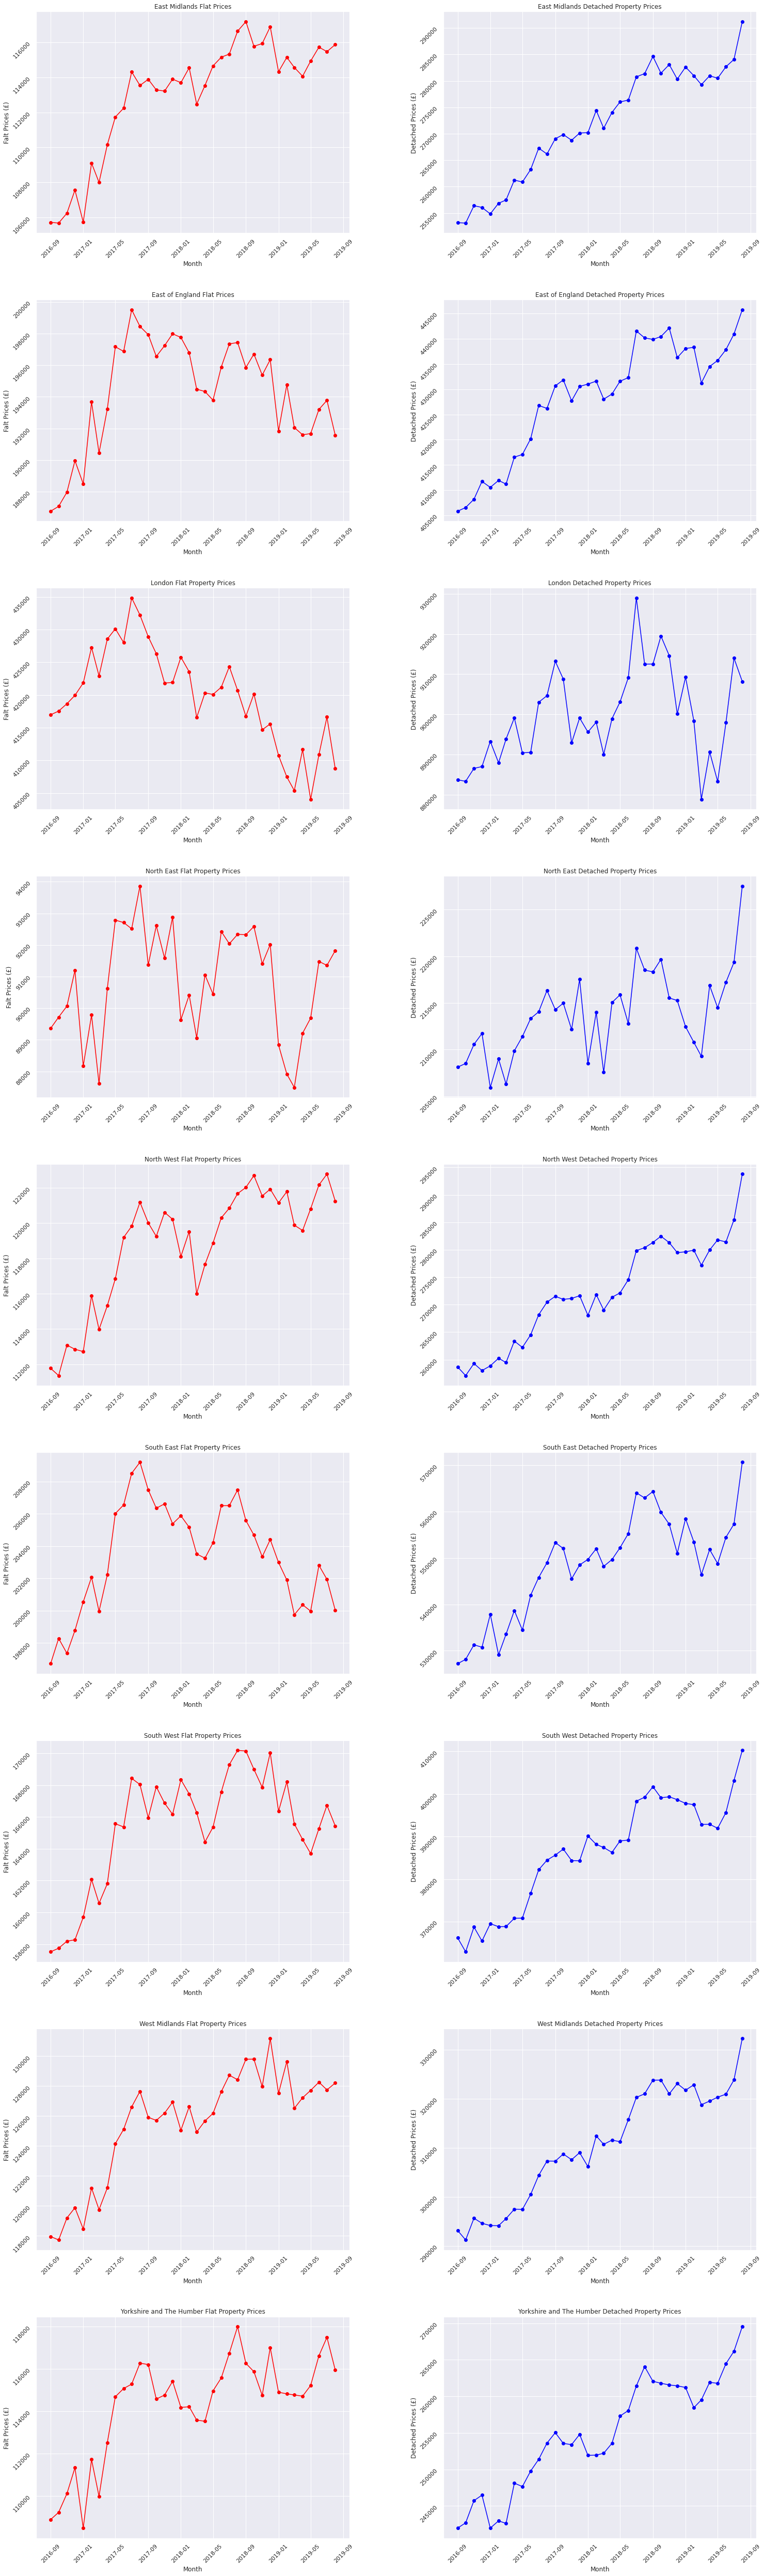

In [32]:
fig, ax = plt.subplots(9, 2, figsize=(25, 90))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

ax[0, 0].plot(regE01['Month'], regE01['Flat'], color='red', marker='o')
ax[0, 0].set_xlabel('Month')
ax[0, 0].set_ylabel('Falt Prices (£)')
ax[0, 0].tick_params(labelrotation=45)
ax[0, 0].set_title("East Midlands Flat Prices")

ax[0, 1].plot(regE01['Month'], regE01['Detached'], color='blue', marker='o')
ax[0, 1].set_xlabel('Month')
ax[0, 1].set_ylabel('Detached Prices (£)')
ax[0, 1].tick_params(labelrotation=45)
ax[0, 1].set_title("East Midlands Detached Property Prices")

ax[1, 0].plot(regE02['Month'], regE02['Flat'], color='red', marker='o')
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_ylabel('Falt Prices (£)')
ax[1, 0].tick_params(labelrotation=45)
ax[1, 0].set_title("East of England Flat Prices")

ax[1, 1].plot(regE02['Month'], regE02['Detached'], color='blue', marker='o')
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_ylabel('Detached Prices (£)')
ax[1, 1].tick_params(labelrotation=45)
ax[1, 1].set_title("East of England Detached Property Prices")

ax[2, 0].plot(regE03['Month'], regE03['Flat'], color='red', marker='o')
ax[2, 0].set_xlabel('Month')
ax[2, 0].set_ylabel('Falt Prices (£)')
ax[2, 0].tick_params(labelrotation=45)
ax[2, 0].set_title("London Flat Property Prices")

ax[2, 1].plot(regE03['Month'], regE03['Detached'], color='blue', marker='o')
ax[2, 1].set_xlabel('Month')
ax[2, 1].set_ylabel('Detached Prices (£)')
ax[2, 1].tick_params(labelrotation=45)
ax[2, 1].set_title("London Detached Property Prices")

ax[3, 0].plot(regE04['Month'], regE04['Flat'], color='red', marker='o')
ax[3, 0].set_xlabel('Month')
ax[3, 0].set_ylabel('Falt Prices (£)')
ax[3, 0].tick_params(labelrotation=45)
ax[3, 0].set_title("North East Flat Property Prices")

ax[3, 1].plot(regE04['Month'], regE04['Detached'], color='blue', marker='o')
ax[3, 1].set_xlabel('Month')
ax[3, 1].set_ylabel('Detached Prices (£)')
ax[3, 1].tick_params(labelrotation=45)
ax[3, 1].set_title("North East Detached Property Prices")

ax[4, 0].plot(regE05['Month'], regE05['Flat'], color='red', marker='o')
ax[4, 0].set_xlabel('Month')
ax[4, 0].set_ylabel('Falt Prices (£)')
ax[4, 0].tick_params(labelrotation=45)
ax[4, 0].set_title("North West Flat Property Prices")

ax[4, 1].plot(regE05['Month'], regE05['Detached'], color='blue', marker='o')
ax[4, 1].set_xlabel('Month')
ax[4, 1].set_ylabel('Detached Prices (£)')
ax[4, 1].tick_params(labelrotation=45)
ax[4, 1].set_title("North West Detached Property Prices")

ax[5, 0].plot(regE06['Month'], regE06['Flat'], color='red', marker='o')
ax[5, 0].set_xlabel('Month')
ax[5, 0].set_ylabel('Falt Prices (£)')
ax[5, 0].tick_params(labelrotation=45)
ax[5, 0].set_title("South East Flat Property Prices")

ax[5, 1].plot(regE06['Month'], regE06['Detached'], color='blue', marker='o')
ax[5, 1].set_xlabel('Month')
ax[5, 1].set_ylabel('Detached Prices (£)')
ax[5, 1].tick_params(labelrotation=45)
ax[5, 1].set_title("South East Detached Property Prices")

ax[6, 0].plot(regE07['Month'], regE07['Flat'], color='red', marker='o')
ax[6, 0].set_xlabel('Month')
ax[6, 0].set_ylabel('Falt Prices (£)')
ax[6, 0].tick_params(labelrotation=45)
ax[6, 0].set_title("South West Flat Property Prices")

ax[6, 1].plot(regE07['Month'], regE07['Detached'], color='blue', marker='o')
ax[6, 1].set_xlabel('Month')
ax[6, 1].set_ylabel('Detached Prices (£)')
ax[6, 1].tick_params(labelrotation=45)
ax[6, 1].set_title("South West Detached Property Prices")

ax[7, 0].plot(regE08['Month'], regE08['Flat'], color='red', marker='o')
ax[7, 0].set_xlabel('Month')
ax[7, 0].set_ylabel('Falt Prices (£)')
ax[7, 0].tick_params(labelrotation=45)
ax[7, 0].set_title("West Midlands Flat Property Prices")

ax[7, 1].plot(regE08['Month'], regE08['Detached'], color='blue', marker='o')
ax[7, 1].set_xlabel('Month')
ax[7, 1].set_ylabel('Detached Prices (£)')
ax[7, 1].tick_params(labelrotation=45)
ax[7, 1].set_title("West Midlands Detached Property Prices")

ax[8, 0].plot(regE09['Month'], regE09['Flat'], color='red', marker='o')
ax[8, 0].set_xlabel('Month')
ax[8, 0].set_ylabel('Falt Prices (£)')
ax[8, 0].tick_params(labelrotation=45)
ax[8, 0].set_title("Yorkshire and The Humber Flat Property Prices")

ax[8, 1].plot(regE09['Month'], regE09['Detached'], color='blue', marker='o')
ax[8, 1].set_xlabel('Month')
ax[8, 1].set_ylabel('Detached Prices (£)')
ax[8, 1].tick_params(labelrotation=45)
ax[8, 1].set_title("Yorkshire and The Humber Detached Property Prices")

plt.show()

The above plots show price trends of properties in separate region, over a 3 year time period. It is important to remember that the y-scales for flat prices and detached prices are different. The average y-scale price for flat prices is £10,000 while the average y-scale for detached prices is ~£33,000. This leads to flat price plots looking like they change in price drastically when compared to detached prices. This is not the case. In most instances increases and decreases between flat and detached properties in the same region are of similar magnitude. More on this later.

A summary of the observations of the trends include:

-    Most properties follow an upward trend, in each region, suggesting further increases in price in the future. Should a linear regression be fitted, this would be easier to visualise. It would further allow for easier future price predictions.

-    Most regions properties have increased in price on average within the three years. This agrees with known knowledge, as property prices are known to rise year after year. Property prices were on average as low as £10,000 in 1977.

-    Properties of the same region seem to follow a similar shaped trend line. This suggests that property type is irrelevant to price trends.

Further points to be considered:

-    North East properties appear to be highly volatile and unpredictable. This may be due to the small y-range of ~£20,000. The rest of the detached properties have a y-range of ~£40,000 on average. This may result in a graph that appears to drop in a large price but does not drop considerably when compared to other graphs. The North East however is slightly more volatile, prone to greater numbers of price increase/decrease when compared to others. 

$$\newline$$

$\large\textbf{2.2: Property Price Comparison by Region}$

Using the Max method to normalize the dataset, a plot is created that allows for easy comparison of all property price trends per region. The times of year can be compared however it is slightly difficult to use for comparison as the graph has many datasets. Never the less the graph is useful for observing price patterns shared by all the properties.

In [33]:
mmf01 = regE01[['Flat']] / regE01['Flat'].max()
mmf02 = regE02[['Flat']] / regE02['Flat'].max()
mmf03 = regE03[['Flat']] / regE03['Flat'].max()
mmf04 = regE04[['Flat']] / regE04['Flat'].max()
mmf05 = regE05[['Flat']] / regE05['Flat'].max()
mmf06 = regE06[['Flat']] / regE06['Flat'].max()
mmf07 = regE07[['Flat']] / regE07['Flat'].max()
mmf08 = regE08[['Flat']] / regE08['Flat'].max()
mmf09 = regE09[['Flat']] / regE09['Flat'].max()

In [34]:
mmd01 = regE01[['Detached']] / regE01['Detached'].max()
mmd02 = regE02[['Detached']] / regE02['Detached'].max()
mmd03 = regE03[['Detached']] / regE03['Detached'].max()
mmd04 = regE04[['Detached']] / regE04['Detached'].max()
mmd05 = regE05[['Detached']] / regE05['Detached'].max()
mmd06 = regE06[['Detached']] / regE06['Detached'].max()
mmd07 = regE07[['Detached']] / regE07['Detached'].max()
mmd08 = regE08[['Detached']] / regE08['Detached'].max()
mmd09 = regE09[['Detached']] / regE09['Detached'].max()

In [35]:
maxf01 = mmf01.assign(Month = regE01['Month'].dt.date)
maxf02 = mmf02.assign(Month = regE02['Month'].dt.date)
maxf03 = mmf03.assign(Month = regE03['Month'].dt.date)
maxf04 = mmf04.assign(Month = regE04['Month'].dt.date)
maxf05 = mmf05.assign(Month = regE05['Month'].dt.date)
maxf06 = mmf06.assign(Month = regE06['Month'].dt.date)
maxf07 = mmf07.assign(Month = regE07['Month'].dt.date)
maxf08 = mmf08.assign(Month = regE08['Month'].dt.date)
maxf09 = mmf09.assign(Month = regE09['Month'].dt.date)

In [36]:
maxd01 = mmd01.assign(Month = regE01['Month'].dt.date)
maxd02 = mmd02.assign(Month = regE02['Month'].dt.date)
maxd03 = mmd03.assign(Month = regE03['Month'].dt.date)
maxd04 = mmd04.assign(Month = regE04['Month'].dt.date)
maxd05 = mmd05.assign(Month = regE05['Month'].dt.date)
maxd06 = mmd06.assign(Month = regE06['Month'].dt.date)
maxd07 = mmd07.assign(Month = regE07['Month'].dt.date)
maxd08 = mmd08.assign(Month = regE08['Month'].dt.date)
maxd09 = mmd09.assign(Month = regE09['Month'].dt.date)

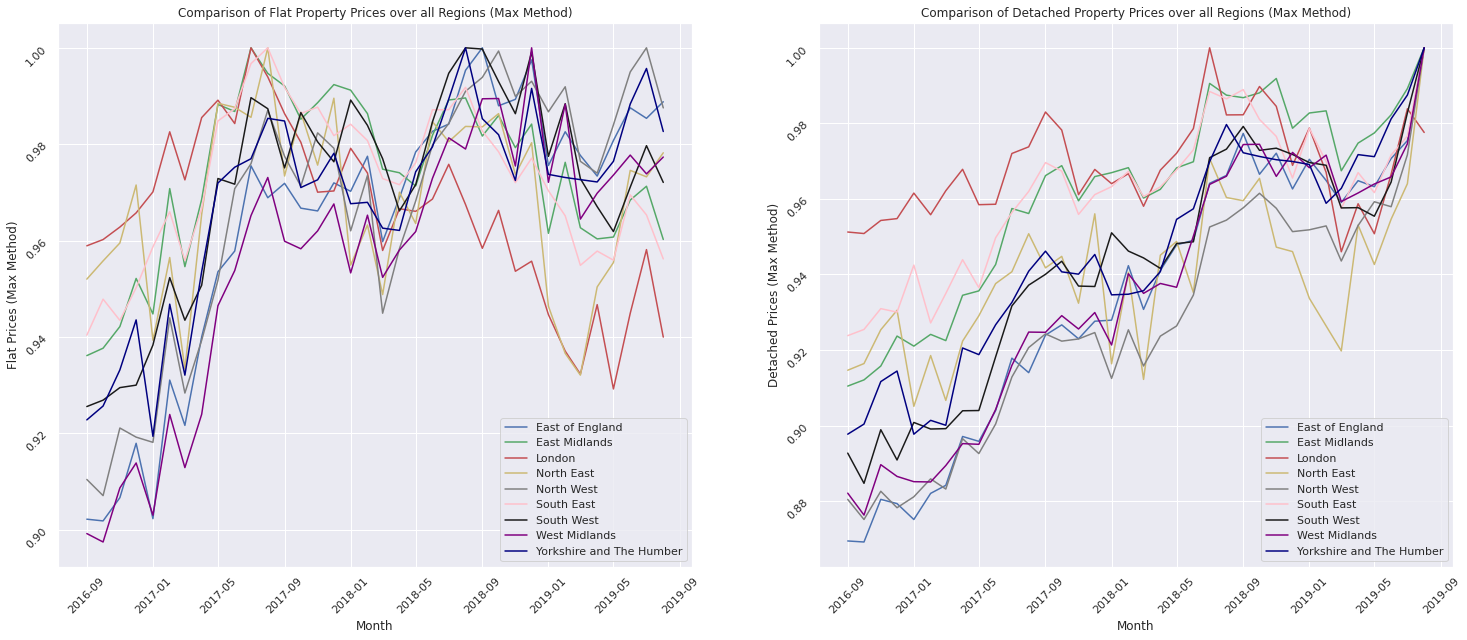

In [37]:
fig, ax4 = plt.subplots(1, 2, figsize=(25, 10))

ax4[0].plot(maxf01['Month'], maxf01['Flat'], color='b', label='East of England')
ax4[0].plot(maxf02['Month'], maxf02['Flat'], color='g', label='East Midlands')
ax4[0].plot(maxf03['Month'], maxf03['Flat'], color='r', label='London')
ax4[0].plot(maxf04['Month'], maxf04['Flat'], color='y', label='North East')
ax4[0].plot(maxf05['Month'], maxf05['Flat'], color='grey', label='North West')
ax4[0].plot(maxf06['Month'], maxf06['Flat'], color='pink', label='South East')
ax4[0].plot(maxf07['Month'], maxf07['Flat'], color='k', label='South West')
ax4[0].plot(maxf08['Month'], maxf08['Flat'], color='purple', label='West Midlands')
ax4[0].plot(maxf09['Month'], maxf09['Flat'], color='navy', label='Yorkshire and The Humber')

ax4[0].set_xlabel('Month')
ax4[0].set_ylabel('Flat Prices (Max Method)')
ax4[0].set_title("Comparison of Flat Property Prices over all Regions (Max Method)")
ax4[0].tick_params(labelrotation=45)

ax4[1].plot(maxd01['Month'], maxd01['Detached'], color='b', label='East of England')
ax4[1].plot(maxd02['Month'], maxd02['Detached'], color='g', label='East Midlands')
ax4[1].plot(maxd03['Month'], maxd03['Detached'], color='r', label='London')
ax4[1].plot(maxd04['Month'], maxd04['Detached'], color='y', label='North East')
ax4[1].plot(maxd05['Month'], maxd05['Detached'], color='grey', label='North West')
ax4[1].plot(maxd06['Month'], maxd06['Detached'], color='pink', label='South East')
ax4[1].plot(maxd07['Month'], maxd07['Detached'], color='k', label='South West')
ax4[1].plot(maxd08['Month'], maxd08['Detached'], color='purple', label='West Midlands')
ax4[1].plot(maxd09['Month'], maxd09['Detached'], color='navy', label='Yorkshire and The Humber')

ax4[1].set_xlabel('Month')
ax4[1].set_ylabel('Detached Prices (Max Method)')
ax4[1].set_title("Comparison of Detached Property Prices over all Regions (Max Method)")
ax4[1].tick_params(labelrotation=45)


ax4[0].legend(loc='lower right')
ax4[1].legend(loc='lower right')
plt.show()

The above plot is used for comparison of the general shape of price trends per region. It is used to easily see the increases or decreases of a property, allowing for easy comparison of property price depending on property type. This plot uses a common y-scale so price increases and decreases can be observed directly.

A comparison of the regions shows:

-    Detached property price trends tend to all roughly follow a similar shape in their given regions. This is the same for flat prices per region. I predict over a larger time scale, this would be more apparent. 

- The flats appear to be quite unpredictable when considering price increase/decreases. They vary in price increase/decrease quite randomly. Detached properties are more predictable, and seem to be prone to less fluctuations in price when compared to flats.

-    The London properties are both volatile and unpredictable, prone to regular large price increase/decrease. The London flats appear to be on a steady decline in pricing since 2017-07. This suggests London flat prices may experience further decrease in future prices. The detached London properties appear to follow no trend up to the date 2019-05, where a large increase in price is observed. The London properties are the most volatile and unpredictable of all other regions.

A comparison of the different times of year shows:

-    Around June there is a large increase in prices each year. This is nearly uniform across all regions, every year. Then, around September, the increasing prices stop and either fall or just remain as they are until June again, where the pattern repeats.

-    There appears to be a large sudden increase in detached property prices from 2019-05, throughout all regions. In some cases there is a price increase by as much as ~£20,000. The 2019-2021 prices would be interesting to see. The prices of detached properties from 2019-05 suggest a large increase going into 2020.

$$\newline$$

$\large\textbf{2.3: Property Price Fluctuations}$

This section explores property price fluctuations. This allows for easy comparison of price increases or decreases each month and over the 3 year period. This plot allows for easy comparison of flat and detached property price fluctuations. It further shows price fluctuations per region however it is more difficult to compare these values.

In [38]:
diff01 = regE01[['Flat']].diff().round(2).fillna(0)
diff02 = regE02[['Flat']].diff().round(2).fillna(0)
diff03 = regE03[['Flat']].diff().round(2).fillna(0)
diff04 = regE04[['Flat']].diff().round(2).fillna(0)
diff05 = regE05[['Flat']].diff().round(2).fillna(0)
diff06 = regE06[['Flat']].diff().round(2).fillna(0)
diff07 = regE07[['Flat']].diff().round(2).fillna(0)
diff08 = regE08[['Flat']].diff().round(2).fillna(0)
diff09 = regE09[['Flat']].diff().round(2).fillna(0)

In [39]:
diff01d = regE01[['Detached']].diff().round(2).fillna(0)
diff02d = regE02[['Detached']].diff().round(2).fillna(0)
diff03d = regE03[['Detached']].diff().round(2).fillna(0)
diff04d = regE04[['Detached']].diff().round(2).fillna(0)
diff05d = regE05[['Detached']].diff().round(2).fillna(0)
diff06d = regE06[['Detached']].diff().round(2).fillna(0)
diff07d = regE07[['Detached']].diff().round(2).fillna(0)
diff08d = regE08[['Detached']].diff().round(2).fillna(0)
diff09d = regE09[['Detached']].diff().round(2).fillna(0)

In [40]:
fdiffm01 = diff01.assign(Month = regE01['Month'].dt.date)
fdiffm02 = diff02.assign(Month = regE02['Month'].dt.date)
fdiffm03 = diff03.assign(Month = regE03['Month'].dt.date)
fdiffm04 = diff04.assign(Month = regE04['Month'].dt.date)
fdiffm05 = diff05.assign(Month = regE05['Month'].dt.date)
fdiffm06 = diff06.assign(Month = regE06['Month'].dt.date)
fdiffm07 = diff07.assign(Month = regE07['Month'].dt.date)
fdiffm08 = diff08.assign(Month = regE08['Month'].dt.date)
fdiffm09 = diff09.assign(Month = regE09['Month'].dt.date)

In [41]:
ddiffm01 = diff01d.assign(Month = regE01['Month'].dt.date)
ddiffm02 = diff02d.assign(Month = regE02['Month'].dt.date)
ddiffm03 = diff03d.assign(Month = regE03['Month'].dt.date)
ddiffm04 = diff04d.assign(Month = regE04['Month'].dt.date)
ddiffm05 = diff05d.assign(Month = regE05['Month'].dt.date)
ddiffm06 = diff06d.assign(Month = regE06['Month'].dt.date)
ddiffm07 = diff07d.assign(Month = regE07['Month'].dt.date)
ddiffm08 = diff08d.assign(Month = regE08['Month'].dt.date)
ddiffm09 = diff09d.assign(Month = regE09['Month'].dt.date)

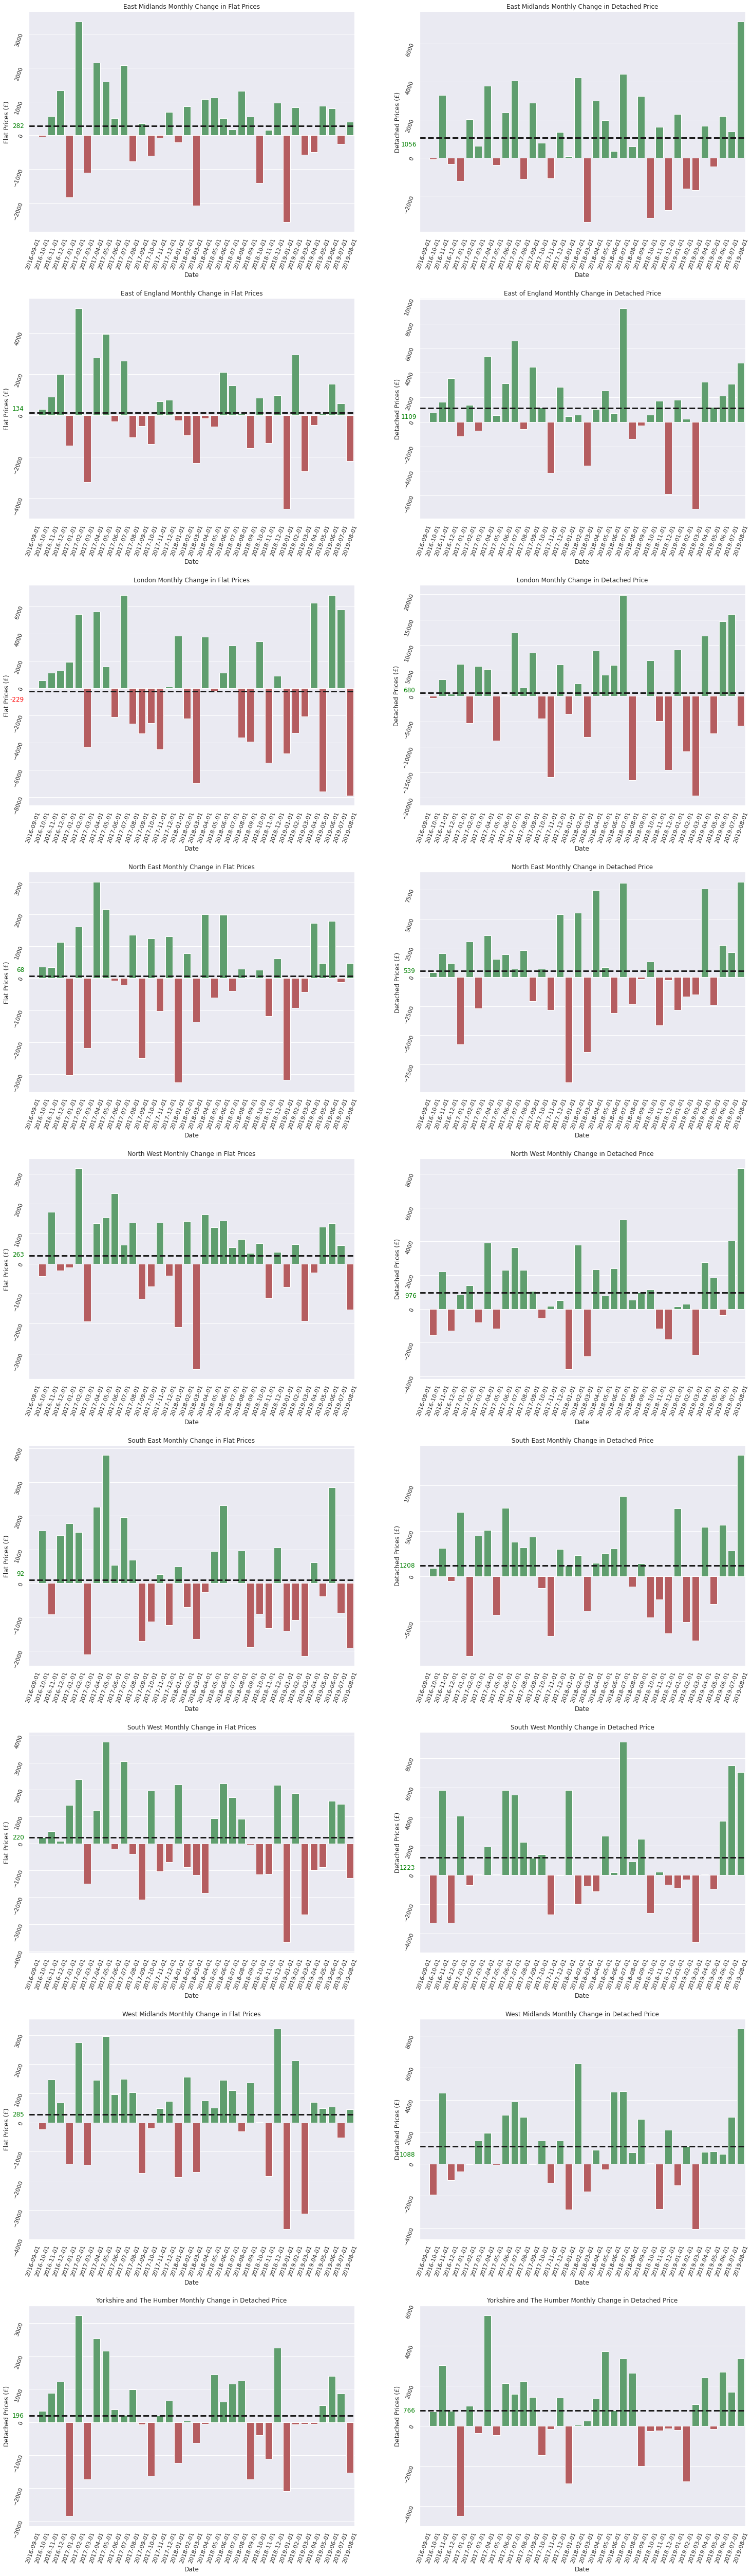

In [42]:
fig, ax3 = plt.subplots(9, 2, sharex=False, figsize=(25,90))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

sns.barplot(ax=ax3[0,0], x=fdiffm01['Month'], y=fdiffm01['Flat'], palette=(fdiffm01['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[0, 0].tick_params(labelrotation=70)
ax3[0, 0].set_xlabel('Date')
ax3[0, 0].set_ylabel('Flat Prices (£)')
ax3[0, 0].set_title("East Midlands Monthly Change in Flat Prices")
ax3[0, 0].axhline(fdiffm01['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[0, 0].text(-1, fdiffm01['Flat'].mean(), "{:.0f}".format(fdiffm01['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[0,1], x=ddiffm01['Month'], y=ddiffm01['Detached'], palette=(ddiffm01['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[0, 1].tick_params(labelrotation=70)
ax3[0, 1].set_xlabel('Date')
ax3[0, 1].set_ylabel('Detached Prices (£)')
ax3[0, 1].set_title("East Midlands Monthly Change in Detached Price")
ax3[0, 1].axhline(ddiffm01['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[0, 1].text(-0.8, ddiffm01['Detached'].mean()-350, "{:.0f}".format(ddiffm01['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[1,0], x=fdiffm02['Month'], y=fdiffm02['Flat'], palette=(fdiffm02['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[1, 0].tick_params(labelrotation=70)
ax3[1, 0].set_xlabel('Date')
ax3[1, 0].set_ylabel('Flat Prices (£)')
ax3[1, 0].set_title("East of England Monthly Change in Flat Prices")
ax3[1, 0].axhline(fdiffm02['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[1, 0].text(-1, fdiffm02['Flat'].mean()+200, "{:.0f}".format(fdiffm02['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[1,1], x=ddiffm02['Month'], y=ddiffm02['Detached'], palette=(ddiffm02['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[1, 1].tick_params(labelrotation=70)
ax3[1, 1].set_xlabel('Date')
ax3[1, 1].set_ylabel('Detached Prices (£)')
ax3[1, 1].set_title("East of England Monthly Change in Detached Price")
ax3[1, 1].axhline(ddiffm02['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[1, 1].text(-0.8, ddiffm02['Detached'].mean()-700, "{:.0f}".format(ddiffm02['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[2,0], x=fdiffm03['Month'], y=fdiffm03['Flat'], palette=(fdiffm03['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[2, 0].tick_params(labelrotation=70)
ax3[2, 0].set_xlabel('Date')
ax3[2, 0].set_ylabel('Flat Prices (£)')
ax3[2, 0].set_title("London Monthly Change in Flat Prices")
ax3[2, 0].axhline(fdiffm03['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[2, 0].text(-1, fdiffm03['Flat'].mean()-600, "{:.0f}".format(fdiffm03['Flat'].mean()), color="red", ha="right", va="center")

sns.barplot(ax=ax3[2,1], x=ddiffm03['Month'], y=ddiffm03['Detached'], palette=(ddiffm03['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[2, 1].tick_params(labelrotation=70)
ax3[2, 1].set_xlabel('Date')
ax3[2, 1].set_ylabel('Detached Prices (£)')
ax3[2, 1].set_title("London Monthly Change in Detached Price")
ax3[2, 1].axhline(ddiffm03['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[2, 1].text(-1, ddiffm03['Detached'].mean()+500, "{:.0f}".format(ddiffm03['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[3,0], x=fdiffm04['Month'], y=fdiffm04['Flat'], palette=(fdiffm04['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[3, 0].tick_params(labelrotation=70)
ax3[3, 0].set_xlabel('Date')
ax3[3, 0].set_ylabel('Flat Prices (£)')
ax3[3, 0].set_title("North East Monthly Change in Flat Prices")
ax3[3, 0].axhline(fdiffm04['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[3, 0].text(-1, fdiffm04['Flat'].mean()+200, "{:.0f}".format(fdiffm04['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[3,1], x=ddiffm04['Month'], y=ddiffm04['Detached'], palette=(ddiffm04['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[3, 1].tick_params(labelrotation=70)
ax3[3, 1].set_xlabel('Date')
ax3[3, 1].set_ylabel('Detached Prices (£)')
ax3[3, 1].set_title("North East Monthly Change in Detached Price")
ax3[3, 1].axhline(ddiffm04['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[3, 1].text(-1, ddiffm04['Detached'].mean(), "{:.0f}".format(ddiffm04['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[4,0], x=fdiffm05['Month'], y=fdiffm05['Flat'], palette=(fdiffm05['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[4, 0].tick_params(labelrotation=70)
ax3[4, 0].set_xlabel('Date')
ax3[4, 0].set_ylabel('Flat Prices (£)')
ax3[4, 0].set_title("North West Monthly Change in Flat Prices")
ax3[4, 0].axhline(fdiffm05['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[4, 0].text(-1, fdiffm05['Flat'].mean()+50, "{:.0f}".format(fdiffm05['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[4,1], x=ddiffm05['Month'], y=ddiffm05['Detached'], palette=(ddiffm05['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[4, 1].tick_params(labelrotation=70)
ax3[4, 1].set_xlabel('Date')
ax3[4, 1].set_ylabel('Detached Prices (£)')
ax3[4, 1].set_title("North West Monthly Change in Detached Price")
ax3[4, 1].axhline(ddiffm05['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[4, 1].text(-0.8, ddiffm05['Detached'].mean()-200, "{:.0f}".format(ddiffm05['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[5,0], x=fdiffm06['Month'], y=fdiffm06['Flat'], palette=(fdiffm06['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[5, 0].tick_params(labelrotation=70)
ax3[5, 0].set_xlabel('Date')
ax3[5, 0].set_ylabel('Flat Prices (£)')
ax3[5, 0].set_title("South East Monthly Change in Flat Prices")
ax3[5, 0].axhline(fdiffm06['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[5, 0].text(-1, fdiffm06['Flat'].mean()+200, "{:.0f}".format(fdiffm06['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[5,1], x=ddiffm06['Month'], y=ddiffm06['Detached'], palette=(ddiffm06['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[5, 1].tick_params(labelrotation=70)
ax3[5, 1].set_xlabel('Date')
ax3[5, 1].set_ylabel('Detached Prices (£)')
ax3[5, 1].set_title("South East Monthly Change in Detached Price")
ax3[5, 1].axhline(ddiffm06['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[5, 1].text(-1, ddiffm06['Detached'].mean(), "{:.0f}".format(ddiffm06['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[6,0], x=fdiffm07['Month'], y=fdiffm07['Flat'], palette=(fdiffm07['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[6, 0].tick_params(labelrotation=70)
ax3[6, 0].set_xlabel('Date')
ax3[6, 0].set_ylabel('Flat Prices (£)')
ax3[6, 0].set_title("South West Monthly Change in Flat Prices")
ax3[6, 0].axhline(fdiffm07['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[6, 0].text(-1, fdiffm07['Flat'].mean(), "{:.0f}".format(fdiffm07['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[6,1], x=ddiffm07['Month'], y=ddiffm07['Detached'], palette=(ddiffm07['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[6, 1].tick_params(labelrotation=70)
ax3[6, 1].set_xlabel('Date')
ax3[6, 1].set_ylabel('Detached Prices (£)')
ax3[6, 1].set_title("South West Monthly Change in Detached Price")
ax3[6, 1].axhline(ddiffm07['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[6, 1].text(-1, ddiffm07['Detached'].mean()-700, "{:.0f}".format(ddiffm07['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[7,0], x=fdiffm08['Month'], y=fdiffm08['Flat'], palette=(fdiffm08['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[7, 0].tick_params(labelrotation=70)
ax3[7, 0].set_xlabel('Date')
ax3[7, 0].set_ylabel('Flat Prices (£)')
ax3[7, 0].set_title("West Midlands Monthly Change in Flat Prices")
ax3[7, 0].axhline(fdiffm08['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[7, 0].text(-1, fdiffm08['Flat'].mean(), "{:.0f}".format(fdiffm08['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[7,1], x=ddiffm08['Month'], y=ddiffm08['Detached'], palette=(ddiffm08['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[7, 1].tick_params(labelrotation=70)
ax3[7, 1].set_xlabel('Date')
ax3[7, 1].set_ylabel('Detached Prices (£)')
ax3[7, 1].set_title("West Midlands Monthly Change in Detached Price")
ax3[7, 1].axhline(ddiffm08['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[7, 1].text(-1, ddiffm08['Detached'].mean()-500, "{:.0f}".format(ddiffm08['Detached'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[8,0], x=fdiffm09['Month'], y=fdiffm09['Flat'], palette=(fdiffm09['Flat'] > 0).map({True: 'g', False: 'r'}))
ax3[8, 0].tick_params(labelrotation=70)
ax3[8, 0].set_xlabel('Date')
ax3[8, 0].set_ylabel('Detached Prices (£)')
ax3[8, 0].set_title("Yorkshire and The Humber Monthly Change in Detached Price")
ax3[8, 0].axhline(fdiffm09['Flat'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[8, 0].text(-1, fdiffm09['Flat'].mean(), "{:.0f}".format(fdiffm09['Flat'].mean()), color="green", ha="right", va="center")

sns.barplot(ax=ax3[8,1], x=ddiffm09['Month'], y=ddiffm09['Detached'], palette=(ddiffm09['Detached'] > 0).map({True: 'g', False: 'r'}))
ax3[8, 1].tick_params(labelrotation=70)
ax3[8, 1].set_xlabel('Date')
ax3[8, 1].set_ylabel('Detached Prices (£)')
ax3[8, 1].set_title("Yorkshire and The Humber Monthly Change in Detached Price")
ax3[8, 1].axhline(ddiffm09['Detached'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax3[8, 1].text(-1, ddiffm09['Detached'].mean(), "{:.0f}".format(ddiffm09['Detached'].mean()), color="green", ha="right", va="center")

plt.show()

The above plot is used to visualise difference in property prices each month. The plot has a mean horizontal bar designed to visualise the proportion of increase or decrease property types in that region have undergone in a year 3 period. The green bars are increase in price, the red are decrease in price. It can be seen:

- That the flat property types have a far greater volume and magnitude of red bar when compared to the detached.

- The mean increase in price over a 3 year period is very small for flats, approximately ~£150. The detached properties have a consistently greater mean, approximately £1000.

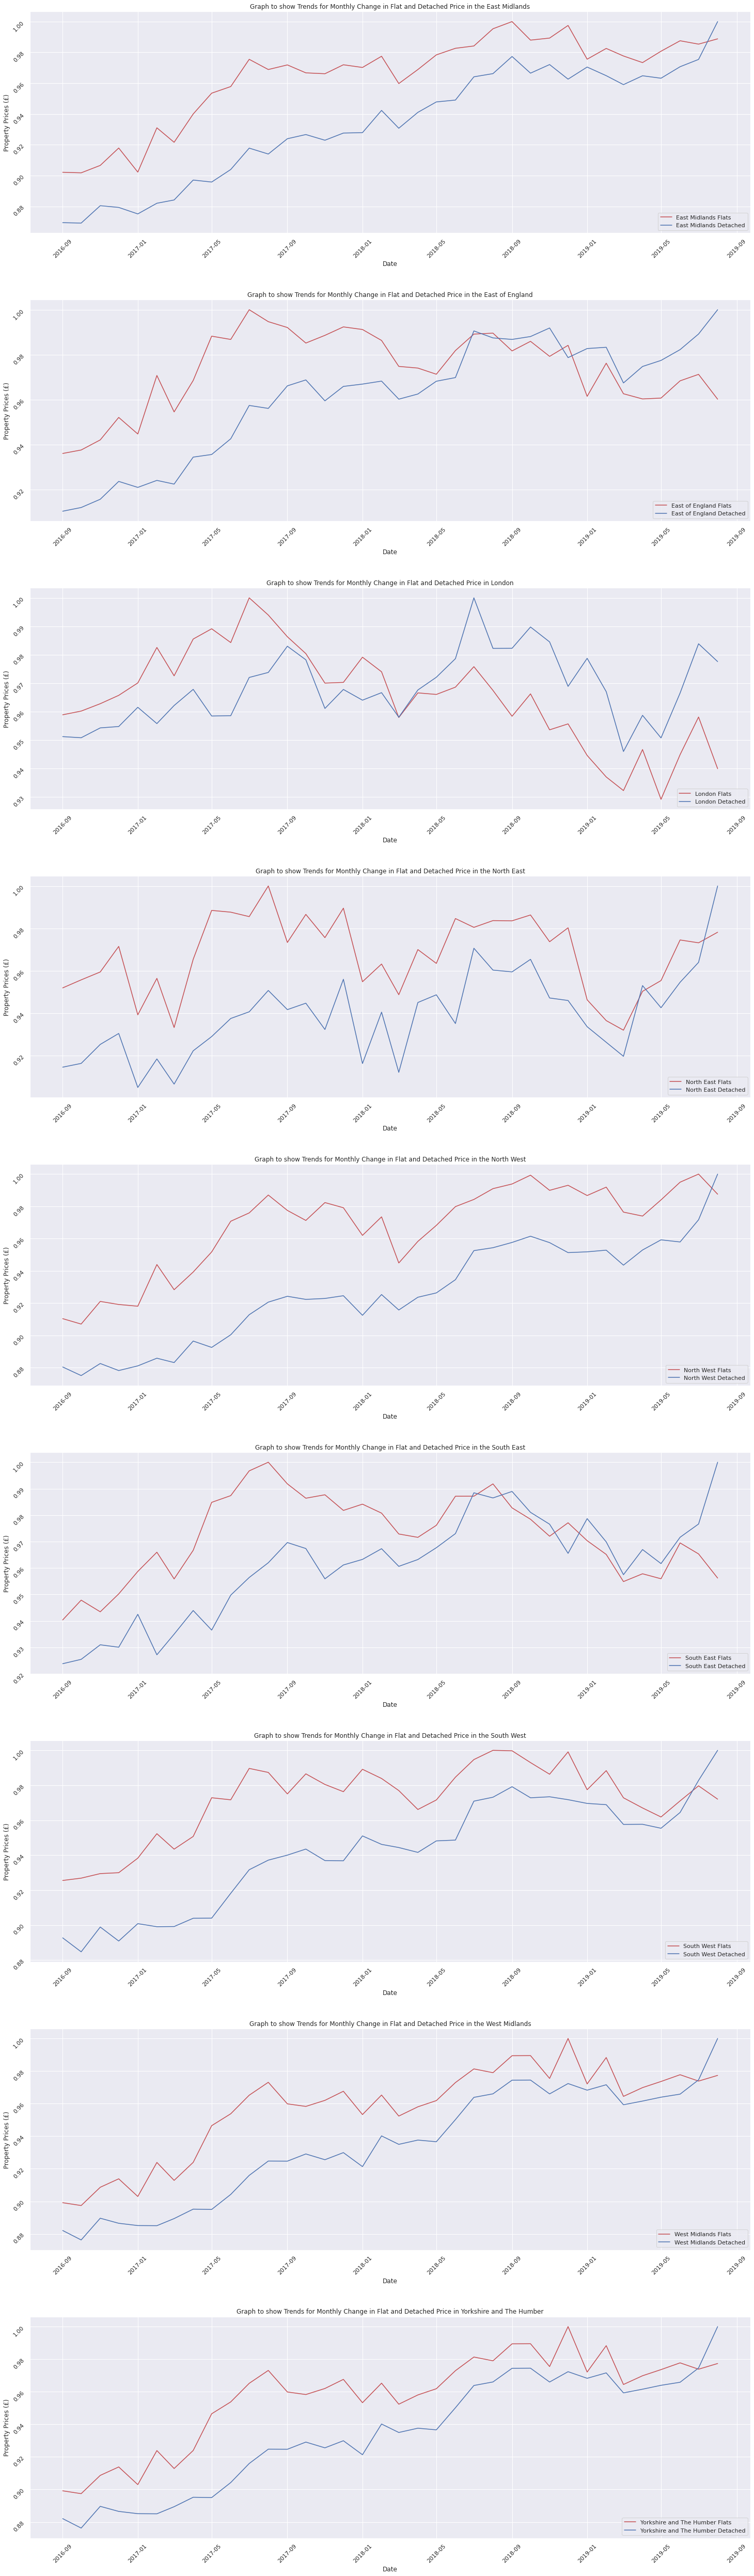

In [43]:
fig, axt = plt.subplots(9, 1, figsize=(25, 90))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

axt[0].plot(maxf01['Month'], maxf01['Flat'], 'r', label='East Midlands Flats')
axt[0].plot(maxd01['Month'], maxd01['Detached'], 'b', label='East Midlands Detached')
axt[0].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the East Midlands")
axt[0].set_xlabel('Date')
axt[0].set_ylabel('Property Prices (£)')
axt[0].tick_params(axis='y')
axt[0].tick_params(labelrotation=45)

axt[1].plot(maxf02['Month'], maxf02['Flat'], 'r', label='East of England Flats')
axt[1].plot(maxd02['Month'], maxd02['Detached'], 'b', label='East of England Detached')
axt[1].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the East of England")
axt[1].set_xlabel('Date')
axt[1].set_ylabel('Property Prices (£)')
axt[1].tick_params(axis='y')
axt[1].tick_params(labelrotation=45)

axt[2].plot(maxf03['Month'], maxf03['Flat'], 'r', label='London Flats')
axt[2].plot(maxd03['Month'], maxd03['Detached'], 'b', label='London Detached')
axt[2].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in London")
axt[2].set_xlabel('Date')
axt[2].set_ylabel('Property Prices (£)')
axt[2].tick_params(axis='y')
axt[2].tick_params(labelrotation=45)

axt[3].plot(maxf04['Month'], maxf04['Flat'], 'r', label='North East Flats')
axt[3].plot(maxd04['Month'], maxd04['Detached'], 'b', label='North East Detached')
axt[3].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the North East")
axt[3].set_xlabel('Date')
axt[3].set_ylabel('Property Prices (£)')
axt[3].tick_params(axis='y')
axt[3].tick_params(labelrotation=45)

axt[4].plot(maxf05['Month'], maxf05['Flat'], 'r', label='North West Flats')
axt[4].plot(maxd05['Month'], maxd05['Detached'], 'b', label='North West Detached')
axt[4].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the North West")
axt[4].set_xlabel('Date')
axt[4].set_ylabel('Property Prices (£)')
axt[4].tick_params(axis='y')
axt[4].tick_params(labelrotation=45)

axt[5].plot(maxf06['Month'], maxf06['Flat'], 'r', label='South East Flats')
axt[5].plot(maxd06['Month'], maxd06['Detached'], 'b', label='South East Detached')
axt[5].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the South East")
axt[5].set_xlabel('Date')
axt[5].set_ylabel('Property Prices (£)')
axt[5].tick_params(axis='y')
axt[5].tick_params(labelrotation=45)

axt[6].plot(maxf07['Month'], maxf07['Flat'], 'r', label='South West Flats')
axt[6].plot(maxd07['Month'], maxd07['Detached'], 'b', label='South West Detached')
axt[6].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the South West")
axt[6].set_xlabel('Date')
axt[6].set_ylabel('Property Prices (£)')
axt[6].tick_params(axis='y')
axt[6].tick_params(labelrotation=45)

axt[7].plot(maxf08['Month'], maxf08['Flat'], 'r', label='West Midlands Flats')
axt[7].plot(maxd08['Month'], maxd08['Detached'], 'b', label='West Midlands Detached')
axt[7].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in the West Midlands")
axt[7].set_xlabel('Date')
axt[7].set_ylabel('Property Prices (£)')
axt[7].tick_params(axis='y')
axt[7].tick_params(labelrotation=45)

axt[8].plot(maxf08['Month'], maxf08['Flat'], 'r', label='Yorkshire and The Humber Flats')
axt[8].plot(maxd08['Month'], maxd08['Detached'], 'b', label='Yorkshire and The Humber Detached')
axt[8].set_title("Graph to show Trends for Monthly Change in Flat and Detached Price in Yorkshire and The Humber")
axt[8].set_xlabel('Date')
axt[8].set_ylabel('Property Prices (£)')
axt[8].tick_params(axis='y')
axt[8].tick_params(labelrotation=45)

axt[0].legend(loc='lower right')
axt[1].legend(loc='lower right')
axt[2].legend(loc='lower right')
axt[3].legend(loc='lower right')
axt[4].legend(loc='lower right')
axt[5].legend(loc='lower right')
axt[6].legend(loc='lower right')
axt[7].legend(loc='lower right')
axt[8].legend(loc='lower right')


The above graph is used to visualise the trends of differing property types. The shape of price trends based on region is easily seen. It can be concluded that different property types:

-    Follow a similar shape. That is, both property prices increase with time and follow a similar trend. This suggests property types are quite insignificant to price trends.

-    Most Detached property prices follow a similar steady positive trend. The detached properties trends are quite predictable for each region. London detached properties are the exception to this. Flat property types follow a similar steady positive trend, but they are prone to more price increase/decreases.

-    Detached property prices are less volatile than flat prices. It can be seen that flat prices fluctuate greatly in direction (increase or decrease), seemingly at random. Detached property prices do not fluctuate as much in direction.

$$\newline$$

$\Large\textbf{Section 3: Change in Flat Prices}$

> **3.1:** Change in Flat Prices 17-18

> **3.2:** Price Change Visualisation

> **3.3:** Price Change Analysis

This section looks primarily at the change in flat prices between the year of 2017-2018. The flat prices in each area per region are compared with as final analysis of the trends to come to conclusions.

$$\newline$$

$\large\textbf{3.1: Change in Flat Prices 2017-18}$

This section focuses on producing a change in flat price dataframe for the years of 2017-2018. Firstly, the prices of flats in each area for 2017 and 2018 are separated and sorted alphabetically according to area.

In [44]:
df2_app_17 = df2_app[df2_app['Month']==('2017-07-01')].sort_values('Area')
df2_app_18 = df2_app[df2_app['Month']==('2018-07-01')].sort_values('Area')

The difference in flat price for the years 2018 and 2017 are now calculated, resulting in a change in price.

In [45]:
cip0 = df2_app_18[['Flat']]-df2_app_17[['Flat']].values[:]
cip = cip0.rename(columns={'Flat': 'Change in Price'})

The changes in flat price between 17-18 for different areas are now put into a final dataframe, complete with areas region.

In [46]:
cipf = cip.assign(Area = df2_app_18['Area'], Region = df2_app_18['Region'])
cipf

Change in Price                          Area                    Region
3334         -2708.81          Barking and Dagenham                    London
3370        -10353.48                        Barnet                    London
2542          2754.68                      Barnsley  Yorkshire and The Humber
778           5425.51  Bath and North East Somerset                South West
1894          1934.74                       Bedford           East of England
...               ...                           ...                       ...
2506           767.40                        Wirral                North West
1462         -5686.57                     Wokingham                South East
3046          3158.33                 Wolverhampton             West Midlands
5422            -6.98                Worcestershire             West Midlands
490          -1642.50                          York  Yorkshire and The Humber

[151 rows x 3 columns]

$$\newline$$

$\large\textbf{3.2: Price Change Visualisation}$

This section includes a visualisation of the change in flat prices between 2017-18, for different areas per region.

In [47]:
cipf_em = cipf[cipf['Region']=='East Midlands']
cipf_eoe = cipf[cipf['Region']=='East of England']
cipf_l = cipf[cipf['Region']=='London']
cipf_ne = cipf[cipf['Region']=='North East']
cipf_nw = cipf[cipf['Region']=='North West']
cipf_se = cipf[cipf['Region']=='South East']
cipf_sw = cipf[cipf['Region']=='South West']
cipf_wm = cipf[cipf['Region']=='West Midlands']
cipf_yh = cipf[cipf['Region']=='Yorkshire and The Humber']

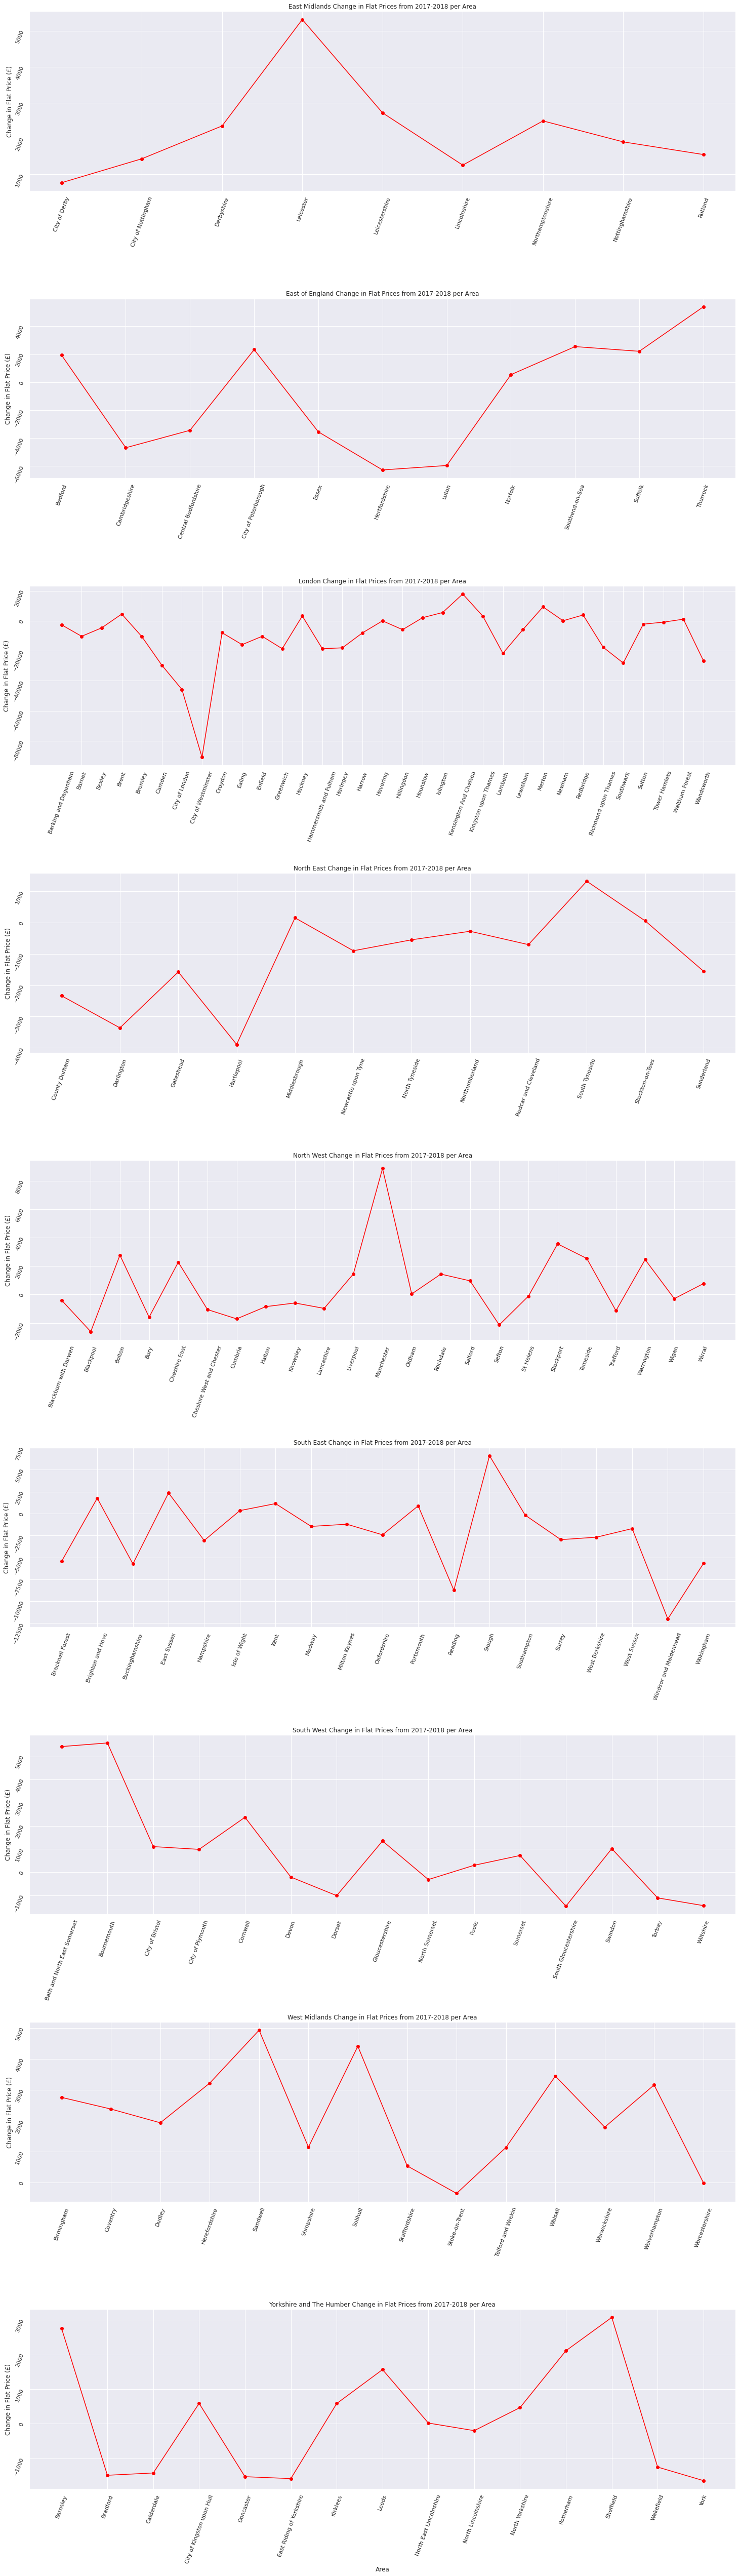

In [48]:
fig, ax2 = plt.subplots(9, 1, figsize=(25, 90))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)

ax2[0].tick_params(labelrotation=70)
ax2[0].plot(cipf_em['Area'], cipf_em['Change in Price'], color='red', marker='o')
ax2[0].set_xlabel("")
ax2[0].set_ylabel("Change in Flat Price (£)")
ax2[0].set_title("East Midlands Change in Flat Prices from 2017-2018 per Area")

ax2[1].tick_params(labelrotation=70)
ax2[1].plot(cipf_eoe['Area'], cipf_eoe['Change in Price'], color='red', marker='o')
ax2[1].set_xlabel("")
ax2[1].set_ylabel("Change in Flat Price (£)")
ax2[1].set_title("East of England Change in Flat Prices from 2017-2018 per Area")

ax2[2].tick_params(labelrotation=70)
ax2[2].plot(cipf_l['Area'], cipf_l['Change in Price'], color='red', marker='o')
ax2[2].set_xlabel("")
ax2[2].set_ylabel("Change in Flat Price (£)")
ax2[2].set_title("London Change in Flat Prices from 2017-2018 per Area")

ax2[3].tick_params(labelrotation=70)
ax2[3].plot(cipf_ne['Area'], cipf_ne['Change in Price'], color='red', marker='o')
ax2[3].set_xlabel("")
ax2[3].set_ylabel("Change in Flat Price (£)")
ax2[3].set_title("North East Change in Flat Prices from 2017-2018 per Area")

ax2[4].tick_params(labelrotation=70)
ax2[4].plot(cipf_nw['Area'], cipf_nw['Change in Price'], color='red', marker='o')
ax2[4].set_xlabel("")
ax2[4].set_ylabel("Change in Flat Price (£)")
ax2[4].set_title("North West Change in Flat Prices from 2017-2018 per Area")

ax2[5].tick_params(labelrotation=70)
ax2[5].plot(cipf_se['Area'], cipf_se['Change in Price'], color='red', marker='o')
ax2[5].set_xlabel("")
ax2[5].set_ylabel("Change in Flat Price (£)")
ax2[5].set_title("South East Change in Flat Prices from 2017-2018 per Area")

ax2[6].tick_params(labelrotation=70)
ax2[6].plot(cipf_sw['Area'], cipf_sw['Change in Price'], color='red', marker='o')
ax2[6].set_xlabel("")
ax2[6].set_ylabel("Change in Flat Price (£)")
ax2[6].set_title("South West Change in Flat Prices from 2017-2018 per Area")

ax2[7].tick_params(labelrotation=70)
ax2[7].plot(cipf_wm['Area'], cipf_wm['Change in Price'], color='red', marker='o')
ax2[7].set_xlabel("")
ax2[7].set_ylabel("Change in Flat Price (£)")
ax2[7].set_title("West Midlands Change in Flat Prices from 2017-2018 per Area")

ax2[8].tick_params(labelrotation=70)
ax2[8].plot(cipf_yh['Area'], cipf_yh['Change in Price'], color='red', marker='o')
ax2[8].set_xlabel("Area")
ax2[8].set_ylabel("Change in Flat Price (£)")
ax2[8].set_title("Yorkshire and The Humber Change in Flat Prices from 2017-2018 per Area")

plt.show()

The above line graphs are difficult to interpret due to the varying y-scale, but it appears there is no correlations between area and change in flat price over all regions. No obvious trends or patterns stand out here. Further analysis is conducted below.

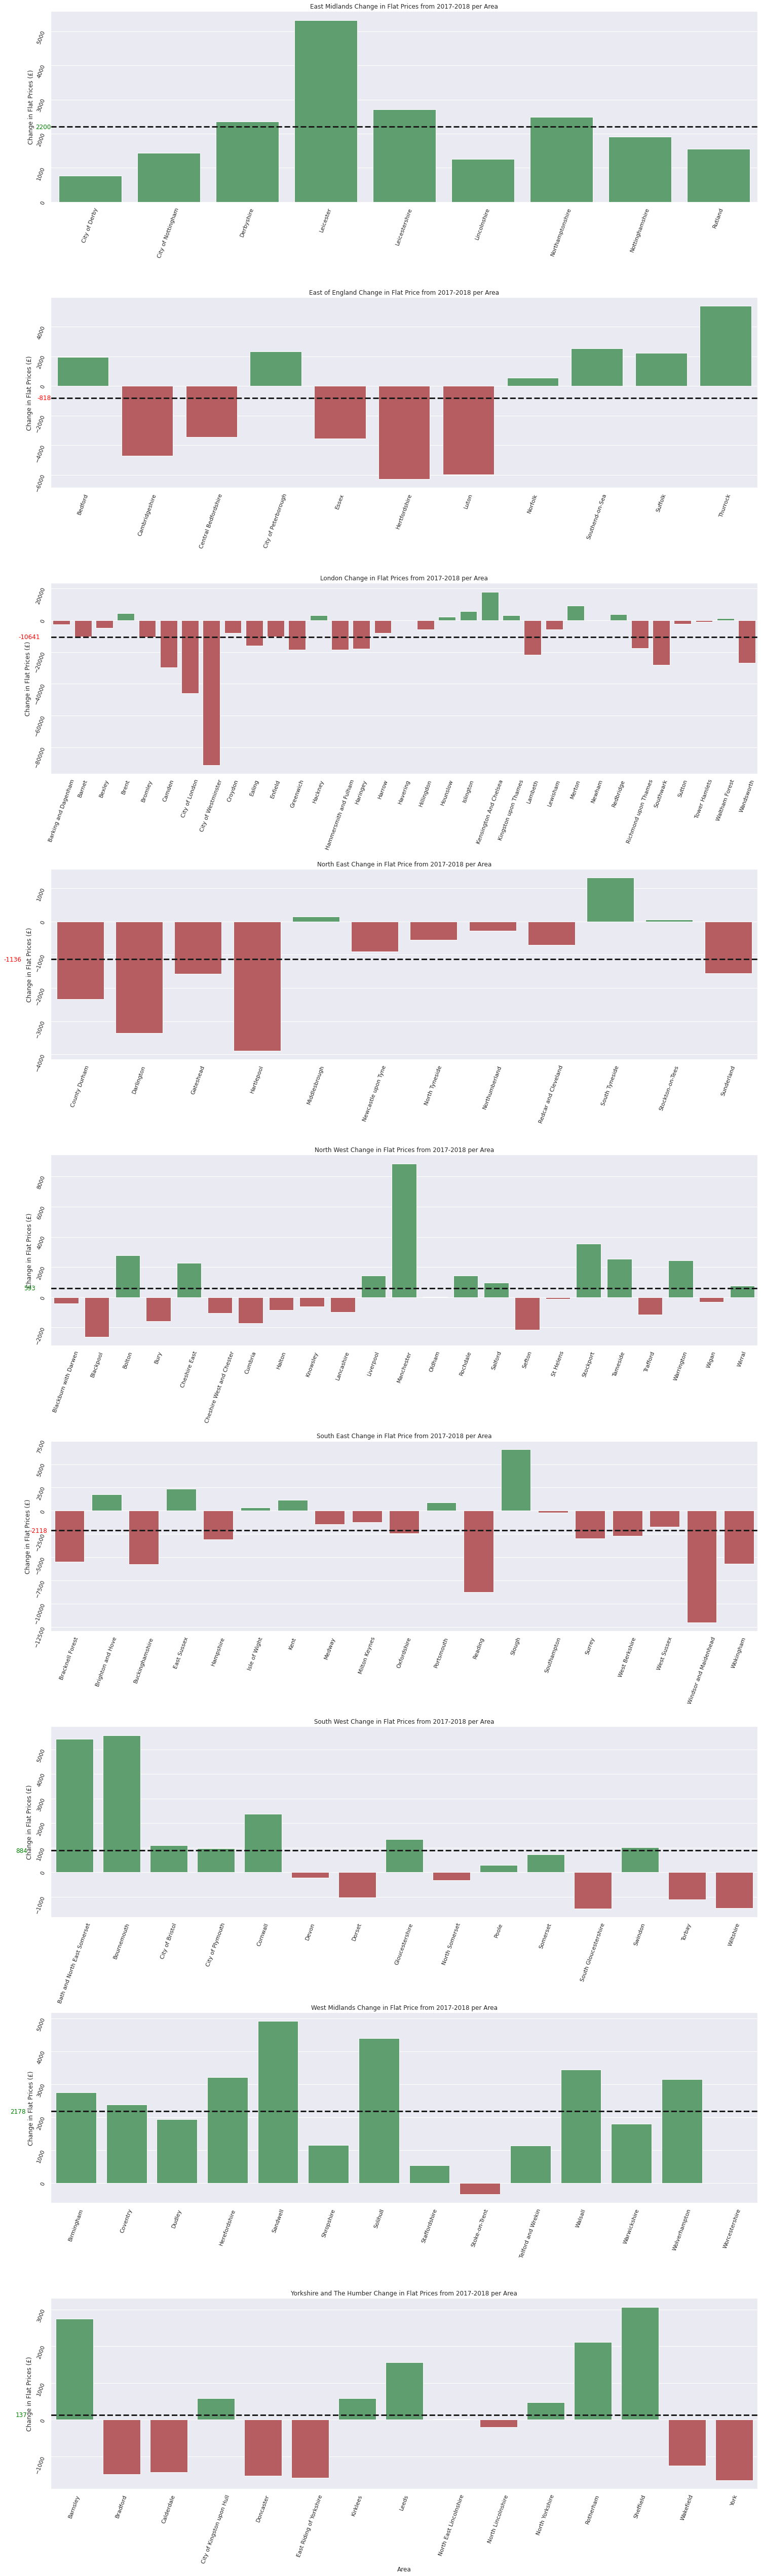

In [49]:
fig, ax6 = plt.subplots(9, 1, sharex=False, figsize=(25,90))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

sns.barplot(ax=ax6[0], x=cipf_em['Area'], y=cipf_em['Change in Price'], palette=(cipf_em['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[0].tick_params(labelrotation=70)
ax6[0].set_xlabel('')
ax6[0].set_ylabel('Change in Flat Prices (£)')
ax6[0].set_title("East Midlands Change in Flat Prices from 2017-2018 per Area")
ax6[0].axhline(cipf_em['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[0].text(-0.5, cipf_em['Change in Price'].mean(), "{:.0f}".format(cipf_em['Change in Price'].mean()), color="green", ha="right", va="center")


sns.barplot(ax=ax6[1], x=cipf_eoe['Area'], y=cipf_eoe['Change in Price'], palette=(cipf_eoe['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[1].tick_params(labelrotation=70)
ax6[1].set_xlabel('')
ax6[1].set_ylabel('Change in Flat Prices (£)')
ax6[1].set_title("East of England Change in Flat Price from 2017-2018 per Area")
ax6[1].axhline(cipf_eoe['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[1].text(-0.5, cipf_eoe['Change in Price'].mean(), "{:.0f}".format(cipf_eoe['Change in Price'].mean()), color="red", ha="right", va="center")


sns.barplot(ax=ax6[2], x=cipf_l['Area'], y=cipf_l['Change in Price'], palette=(cipf_l['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[2].tick_params(labelrotation=70)
ax6[2].set_xlabel('')
ax6[2].set_ylabel('Change in Flat Prices (£)')
ax6[2].set_title("London Change in Flat Prices from 2017-2018 per Area")
ax6[2].axhline(cipf_l['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[2].text(-1, cipf_l['Change in Price'].mean(), "{:.0f}".format(cipf_l['Change in Price'].mean()), color="red", ha="right", va="center")


sns.barplot(ax=ax6[3], x=cipf_ne['Area'], y=cipf_ne['Change in Price'], palette=(cipf_ne['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[3].tick_params(labelrotation=70)
ax6[3].set_xlabel('')
ax6[3].set_ylabel('Change in Flat Prices (£)')
ax6[3].set_title("North East Change in Flat Price from 2017-2018 per Area")
ax6[3].axhline(cipf_ne['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[3].text(-1, cipf_ne['Change in Price'].mean(), "{:.0f}".format(cipf_ne['Change in Price'].mean()), color="red", ha="right", va="center")

sns.barplot(ax=ax6[4], x=cipf_nw['Area'], y=cipf_nw['Change in Price'], palette=(cipf_nw['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[4].tick_params(labelrotation=70)
ax6[4].set_xlabel('')
ax6[4].set_ylabel('Change in Flat Prices (£)')
ax6[4].set_title("North West Change in Flat Prices from 2017-2018 per Area")
ax6[4].axhline(cipf_nw['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[4].text(-1, cipf_nw['Change in Price'].mean(), "{:.0f}".format(cipf_nw['Change in Price'].mean()), color="green", ha="right", va="center")


sns.barplot(ax=ax6[5], x=cipf_se['Area'], y=cipf_se['Change in Price'], palette=(cipf_se['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[5].tick_params(labelrotation=70)
ax6[5].set_xlabel('')
ax6[5].set_ylabel('Change in Flat Prices (£)')
ax6[5].set_title("South East Change in Flat Price from 2017-2018 per Area")
ax6[5].axhline(cipf_se['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[5].text(-0.6, cipf_se['Change in Price'].mean(), "{:.0f}".format(cipf_se['Change in Price'].mean()), color="red", ha="right", va="center")


sns.barplot(ax=ax6[6], x=cipf_sw['Area'], y=cipf_sw['Change in Price'], palette=(cipf_sw['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[6].tick_params(labelrotation=70)
ax6[6].set_xlabel('')
ax6[6].set_ylabel('Change in Flat Prices (£)')
ax6[6].set_title("South West Change in Flat Prices from 2017-2018 per Area")
ax6[6].axhline(cipf_sw['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[6].text(-1, cipf_sw['Change in Price'].mean(), "{:.0f}".format(cipf_sw['Change in Price'].mean()), color="green", ha="right", va="center")


sns.barplot(ax=ax6[7], x=cipf_wm['Area'], y=cipf_wm['Change in Price'], palette=(cipf_wm['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[7].tick_params(labelrotation=70)
ax6[7].set_xlabel('')
ax6[7].set_ylabel('Change in Flat Prices (£)')
ax6[7].set_title("West Midlands Change in Flat Price from 2017-2018 per Area")
ax6[7].axhline(cipf_wm['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[7].text(-1, cipf_wm['Change in Price'].mean(), "{:.0f}".format(cipf_wm['Change in Price'].mean()), color="green", ha="right", va="center")


sns.barplot(ax=ax6[8], x=cipf_yh['Area'], y=cipf_yh['Change in Price'], palette=(cipf_yh['Change in Price'] > 0).map({True: 'g', False: 'r'}))
ax6[8].tick_params(labelrotation=70)
ax6[8].set_xlabel('Area')
ax6[8].set_ylabel('Change in Flat Prices (£)')
ax6[8].set_title("Yorkshire and The Humber Change in Flat Prices from 2017-2018 per Area")
ax6[8].axhline(cipf_yh['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
ax6[8].text(-1, cipf_yh['Change in Price'].mean(), "{:.0f}".format(cipf_yh['Change in Price'].mean()), color="green", ha="right", va="center")

plt.show()

This graph is above bar graph is far better for visualising trends in price changes when compared to the line graph above. The bar graph is used to easily visualise change in prices of flats in a given area between 2017-18, in different regions. The mean change in flat price is given by the horizontal dotted line, with the value to the left. Some regions have large decreases shown by many red bars, while some have large increases shown by many green bars. This suggests region has a large influence on change in flat prices between the years 2017-18.

$$\newline$$

$\large\textbf{3.3: Price Change Analysis}$

The bar charts above show area price increases in green, with area decreases in red. The mean per region is highlighted by the dotted line. This plot clearly visualises regions of property increase. For example, West and East Midlands area property flat prices have mostly increased between the years 2017 and 2018. Where as the North East and West area flat properties have mostly decreased in value. This plot visualises results far more efficiently.

East and West Midlands have a combined mean increase in flat property values of £4378. The North East and West have a combined mean decrease in flat property values of -£3254. This suggests flat prices in the East and West Midlands will continue to increase in future years, where as flats in the regions North East and West may continue to decrease. Further research over a larger time span is needed to conclude this quantitatively.

London flat prices have an overall decrease in the year 2017-18. This suggests further decreases in flat prices in the future. Again, further research is needed. However, a large mean decrease of ~-£10,500 does not represent the results very well. The City of Westminster has a decrease in flat property prices of ~-£9500. This should be regarded as an outlier for this region and effects the mean greatly. The City of London area is also marked as an outlier as described below.

In [50]:
cipf_l_outliers = cipf_l.loc[(cipf_l['Change in Price']<1-2*cipf_l['Change in Price'].std())]
cipf_l_out = cipf_l.drop(cipf_l_outliers.index)

In [51]:
cipf_l_outliers

Change in Price                 Area  Region
3298        -45772.44       City of London  London
4450        -90900.29  City of Westminster  London

Removing the above outliers, a new plot can be made for London.

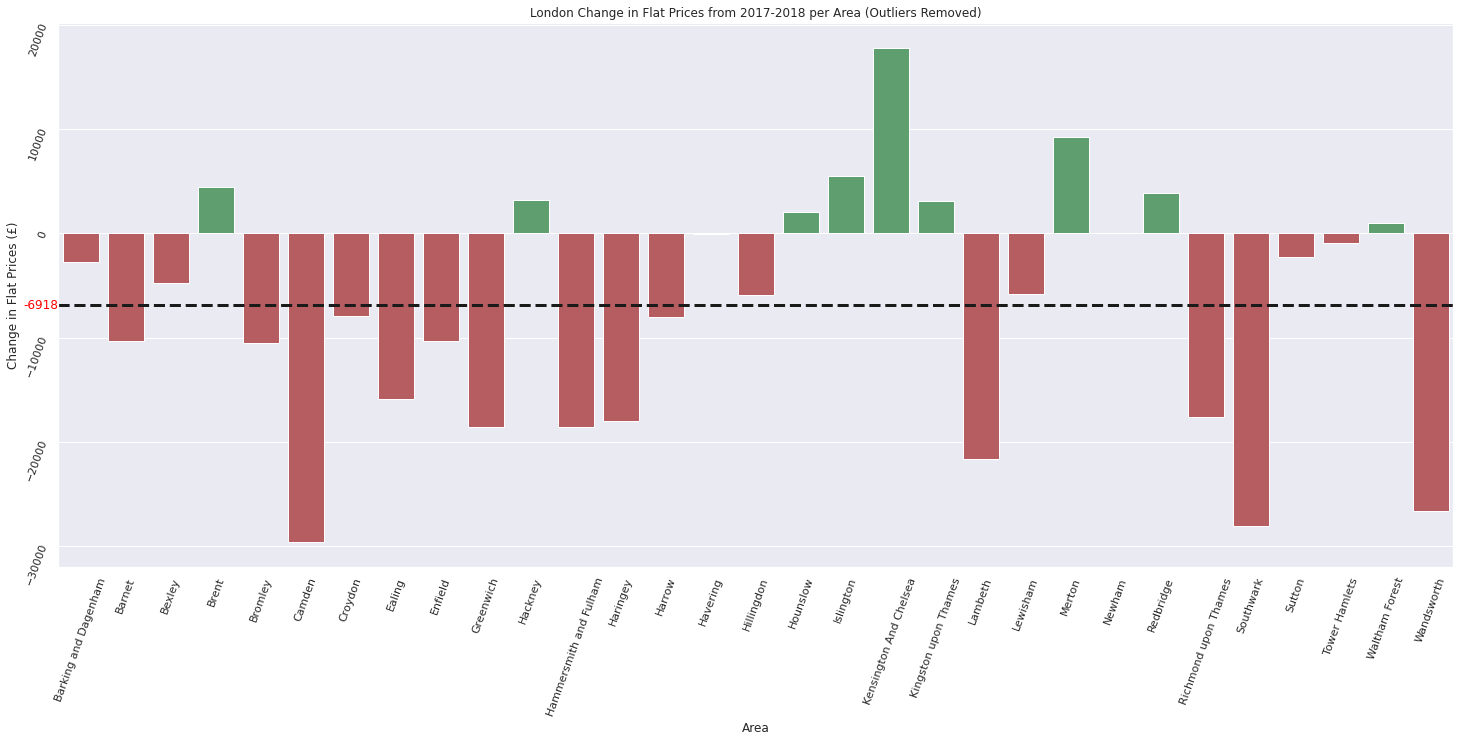

In [52]:
fig, out= plt.subplots(1, 1, sharex=False, figsize=(25,10))
sns.barplot(x=cipf_l_out['Area'], y=cipf_l_out['Change in Price'], palette=(cipf_l_out['Change in Price'] > 0).map({True: 'g', False: 'r'}))

out.tick_params(labelrotation=70)
out.set_xlabel('Area')
out.set_ylabel('Change in Flat Prices (£)')
out.set_title("London Change in Flat Prices from 2017-2018 per Area (Outliers Removed)")
out.axhline(cipf_l_out['Change in Price'].mean(), linewidth=3, color='k', linestyle='--', label='Mean')
out.text(-0.5, cipf_l_out['Change in Price'].mean(), "{:.0f}".format(cipf_l_out['Change in Price'].mean()), color="red", ha="right", va="center")

plt.show()

Perhaps not surprisingly, the London area still has a large mean decrease in flat prices for the year 2017-18. This is expected as most areas show a negative change in price. Furthermore, in the price trend analysis in section 2, London was prone to large and seemingly random increases or decreases in flat prices. The three year flat price trend also declined.

$$\newline$$

$\Large\textbf{Section 4: Statistical Analysis}$

> **4.1:** Price Increase/Decrease Cross-Tabulation

> **4.2:** Chi-Square Test

> **4.3:** Interpreting the Results

This section includes statistical analysis to see if there is evidence that the change in the price of flats has affected all the regions
similarly. Regional area flat price increase/decrease is cross tabulated. A chi-square test is then used to test for a null hypothesis.

$$\newline$$

$\large\textbf{4.1: Price Increase/Decrease Cross-Tabulation}$

This section performs cross-tabulation to show the number of areas in a given regions with an increase or decrease in flat prices between 2017-18. Firstly, positive and negative changes in price are separated.

In [53]:
pv1 = cipf_em['Change in Price'].gt(0).sum()
pv2 = cipf_eoe['Change in Price'].gt(0).sum()
pv3 = cipf_l['Change in Price'].gt(0).sum()
pv4 = cipf_ne['Change in Price'].gt(0).sum()
pv5 = cipf_nw['Change in Price'].gt(0).sum()
pv6 = cipf_se['Change in Price'].gt(0).sum()
pv7 = cipf_sw['Change in Price'].gt(0).sum()
pv8 = cipf_wm['Change in Price'].gt(0).sum()
pv9 = cipf_yh['Change in Price'].gt(0).sum()

In [54]:
nv1 = cipf_em['Change in Price'].lt(0).sum()
nv2 = cipf_eoe['Change in Price'].lt(0).sum()
nv3 = cipf_l['Change in Price'].lt(0).sum()
nv4 = cipf_ne['Change in Price'].lt(0).sum()
nv5 = cipf_nw['Change in Price'].lt(0).sum()
nv6 = cipf_se['Change in Price'].lt(0).sum()
nv7 = cipf_sw['Change in Price'].lt(0).sum()
nv8 = cipf_wm['Change in Price'].lt(0).sum()
nv9 = cipf_yh['Change in Price'].lt(0).sum()

Arrays of positive and negative values are created for later use.

In [55]:
inc_reg = np.array([pv1, pv2, pv3, pv4, pv5, pv6, pv7, pv8, pv9])
dec_reg = np.array([nv1, nv2, nv3, nv4, nv5, nv6, nv7, nv8, nv9])

Regions are arranged alphabetically.

In [56]:
reg_ct = cipf['Region'].unique()
reg_ct_alph = np.sort(reg_ct)

A dataframe showing the number of areas that increase or decrease in price changes between 2017-18 per region is created.

In [57]:
dfpn = pd.DataFrame(data=(inc_reg, dec_reg),
                  index = ['Increase', 'Decrease'],
                  columns = reg_ct_alph)
dfpn

East Midlands  East of England  London  North East  North West  \
Increase              9                6      10           3          11   
Decrease              0                5      23           9          12   

          South East  South West  West Midlands  Yorkshire and The Humber  
Increase           6           9             12                         8  
Decrease          13           6              2                         7

$$\newline$$

$\large\textbf{4.2: Chi-Square Test}$

A chi-square test is performed to see if the change in flat prices affects all regions similarly.

In [58]:
test_stat, p_value, dof, expected = sci.chi2_contingency(dfpn, correction=False)

print('There are %d degrees of freedom' % dof)
print('The p-value is %4.3f%% ' % (100*p_value))
print('The significance level is 0.05')
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The null hypothesis is rejected')

There are 8 degrees of freedom
The p-value is 0.056% 
The significance level is 0.05
The chi-squared test statistic is 27.60
The null hypothesis is rejected


$$\newline$$

$\large\textbf{4.3: Interpreting the Results}$

A chi-square test of independence was performed to examine the relation between flat price increase or decrease and region. The p-value of 0.000056 is lower than the significance level of 0.05. This means we can reject the null hypothesis. This means that there is likely a statistical relationship between change in flat prices and region. This makes sense intuitively as we know that depending on where you are in the UK, house prices change. London for example is very expensive where as Yorkshire and The Humber is cheaper in general.

$$\newline$$

$\large\textbf{Conclusion}$

  The price trend analysis of section 2 showed a considerable increase in properties from 2016-2019. Flat prices were more prone to sudden significant increases/decreases in price when compared to detached properties. Detached properties in general were quite predictable in pricing, following a steady increase in price trend with no large areas of fluctuation. Both property types followed a similar shaped price trends over three years which gradually increased, suggesting property type had no influence on overall price trends. 
  
  It was further concluded, that between June to September, property prices generally rise, while September to June property prices generally fell or remained the same. On the date of 2019-05, a large increase in detached property prices was seen, which suggested further increase in future pricing, however more data and research is needed to confirm this. 
  
  Region had little effect on price trends as analysis has shown that a general upward trend was shared by all detached properties, regardless of region. Flats followed a similar shape trend however it was more prone to price fluctuations and did not increase as much as detached properties. The London region pricing was highly unpredictable and very volatile. Furthermore it was the only region that suggested future decreases in pricing.

  It was concluded that price changes were heavily influenced by region. Regions such as London were subject to large decreases in mean area prices while regions such as the East Midlands were subject to large increases. The relation between flat prices and region was further proven by a chi-square test, where we concluded that the null hypothesis could be rejected.
  
  Overall, the regions had no large effect on price trends over a large time period, however did have an effect on change in area pricing over a small time period. The times of the year also had a large effect on price trends. The type of properties was considered insignificant as they followed similar price trends. More research should be conducted to verify these results. Taking property pricing over a larger time period would achieve this.

$$\newline$$